In [1]:
#Import libraries

#from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml

#Import module to Standardize the data
from sklearn.preprocessing import StandardScaler

#Import module to compute metrics
from sklearn import metrics

# Import module to split dataset
from sklearn.model_selection import train_test_split

# Import module for fitting
from sklearn.linear_model import LogisticRegression

# Import data analysis modules
import pandas as pd
import numpy as np

# Import visualization modules
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Part-1: Exploratory Data Analysis (EDA):

L'analyse exploratoire des données est l'une des étapes importantes du processus d'analyse des données. Ici, l'accent est mis sur le sens des données en main - des choses comme formuler les bonnes questions à poser à l'ensemble de données, comment manipuler les sources de données pour obtenir les réponses requises, etc.

## Chargement des données de déplacements de l'EMD MEL 2016

In [2]:
df_trips = pd.read_csv('df_trips_MEL.csv',sep=',')
df_trips.info()
df_trips.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24572 entries, 0 to 24571
Data columns (total 56 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   person_id                          24572 non-null  int64  
 1   trip_id                            24572 non-null  int64  
 2   trip_weight                        24572 non-null  float64
 3   departure_time                     24572 non-null  float64
 4   arrival_time                       24572 non-null  float64
 5   trip_duration                      24572 non-null  float64
 6   activity_duration                  18799 non-null  float64
 7   following_purpose                  24572 non-null  object 
 8   preceding_purpose                  24572 non-null  object 
 9   is_last_trip                       24572 non-null  bool   
 10  is_first_trip                      24572 non-null  bool   
 11  mode                               24572 non-null  obj

,person_id,trip_id,trip_weight,departure_time,arrival_time,trip_duration,activity_duration,origin_departement_id,destination_departement_id,euclidean_distance,...,vot_purpose,vot_mode,choice,choice_intermodal,socioprofessional_class_detailled,professional_occupation,age,has_parking_place_problem,socioprofessional_class,number_of_trips
count,24572.000000,24572.000000,24572.000000,24572.000000,24572.000000,24572.000000,18799.000000,24572.0,24572.0,24572.000000,...,24572.000000,24572.000000,24572.000000,24572.000000,24572.000000,24572.000000,24572.000000,7463.000000,24572.000000,24572.000000
mean,4967.632631,18912.207675,110.350112,49847.983884,50793.120625,945.136741,7912.186818,59.0,59.0,2812.942943,...,8.730913,9.500472,1.734739,1.921781,58.268395,3.730059,38.181711,2.385636,5.223873,5.545662
std,2906.743762,10901.895205,46.125026,15158.030933,15162.396768,915.138172,9552.278203,0.0,0.0,3592.063922,...,2.041696,2.717475,1.741004,1.998816,19.095621,2.534500,20.173858,0.830933,1.634946,2.862438
min,2.000000,12.000000,12.959220,14400.000000,14700.000000,60.000000,0.000000,59.0,59.0,51.000000,...,6.800000,6.800000,0.000000,0.000000,0.000000,1.000000,5.000000,1.000000,0.000000,1.000000
25%,2464.000000,9345.750000,80.323640,36360.000000,37680.000000,300.000000,840.000000,59.0,59.0,580.000000,...,7.900000,6.800000,0.000000,0.000000,41.000000,1.000000,22.000000,2.000000,4.000000,4.000000
50%,4813.500000,18545.500000,102.826100,50400.000000,51000.000000,600.000000,3900.000000,59.0,59.0,1280.500000,...,7.900000,10.000000,1.000000,1.000000,55.000000,4.000000,37.000000,3.000000,5.000000,5.000000
75%,7440.000000,28381.250000,133.859500,61560.000000,63000.000000,1200.000000,11700.000000,59.0,59.0,3622.000000,...,10.000000,10.000000,4.000000,4.000000,83.000000,6.000000,53.000000,3.000000,7.000000,7.000000
max,10169.000000,38179.000000,495.797900,100740.000000,101700.000000,25200.000000,57900.000000,59.0,59.0,48580.000000,...,17.500000,17.500000,4.000000,7.000000,89.000000,9.000000,94.000000,4.000000,9.000000,19.000000


In [3]:
df_persons = pd.read_csv('df_persons_MEL.csv',sep=',')
df_persons.info()
df_persons.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7437 entries, 0 to 7436
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   person_id                          7437 non-null   int64  
 1   household_id                       7437 non-null   int64  
 2   person_weight                      7437 non-null   float64
 3   age                                7437 non-null   int64  
 4   sex                                7437 non-null   object 
 5   employed                           7437 non-null   bool   
 6   studies                            7437 non-null   bool   
 7   professional_occupation            7437 non-null   int64  
 8   has_license                        7437 non-null   bool   
 9   has_pt_subscription                7437 non-null   bool   
 10  number_of_trips                    7437 non-null   int64  
 11  departement_id                     7437 non-null   int64

,person_id,household_id,person_weight,age,professional_occupation,number_of_trips,departement_id,trip_weight,number_of_vehicles,number_of_bikes,...,euclidean_distance_to_work_study,distance_to_work_study_class,use_car_to_go_work_study,has_parking_place_problem,walk_use_frequency,car_use_frequency,car_passenger_use_frequency,pt_use_frequency,2RM_use_frequency,bike_use_frequency
count,7437.000000,7437.000000,7437.000000,7437.000000,7437.000000,7437.000000,7437.0,7437.000000,7437.000000,7437.000000,...,7437.000000,7437.00000,7437.000000,1635.000000,6681.000000,6681.000000,6681.000000,6681.000000,6681.000000,6681.000000
mean,5077.905742,2408.695307,109.134837,36.221595,4.581686,3.304020,59.0,109.134837,1.252387,1.500874,...,3565.668953,0.11147,3.303617,2.382263,1.555306,3.067655,3.109564,3.530010,4.947164,4.401886
std,2912.362994,1252.259376,47.904958,23.915849,2.814739,2.721658,0.0,47.904958,0.844186,1.712422,...,17786.334555,0.47625,1.241671,0.827941,1.062833,1.863991,1.411024,1.497515,0.372391,1.015887
min,2.000000,1.000000,12.959220,1.000000,1.000000,0.000000,59.0,12.959220,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2535.000000,1350.000000,78.003200,14.000000,1.000000,2.000000,59.0,78.003200,1.000000,0.000000,...,0.000000,0.00000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,5.000000,4.000000
50%,5019.000000,2426.000000,101.102100,34.000000,5.000000,3.000000,59.0,101.102100,1.000000,1.000000,...,391.000000,0.00000,4.000000,3.000000,1.000000,3.000000,3.000000,4.000000,5.000000,5.000000
75%,7603.000000,3474.000000,132.420100,56.000000,7.000000,5.000000,59.0,132.420100,2.000000,3.000000,...,3343.000000,0.00000,4.000000,3.000000,2.000000,5.000000,4.000000,5.000000,5.000000,5.000000
max,10170.000000,4538.000000,613.116300,96.000000,9.000000,19.000000,59.0,613.116300,4.000000,10.000000,...,848091.000000,5.00000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
df_households = pd.read_csv('df_households_MEL.csv',sep=',')
df_households.info()
df_households.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   household_id        3818 non-null   int64  
 1   household_weight    3818 non-null   float64
 2   household_size      3818 non-null   int64  
 3   number_of_vehicles  3818 non-null   int64  
 4   number_of_bikes     3818 non-null   int64  
 5   departement_id      3818 non-null   int64  
 6   income_class        3818 non-null   int64  
 7   consumption_units   3818 non-null   float64
 8   commune_id          3818 non-null   int64  
 9   zone_fine_id        3818 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 298.4 KB


,household_id,household_weight,household_size,number_of_vehicles,number_of_bikes,departement_id,income_class,consumption_units,commune_id,zone_fine_id
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.0,3818.0,3818.000000,3818.0,3818.000000
mean,2306.075956,108.105340,2.382923,1.093243,1.140126,59.0,0.0,1.592981,59350.0,127887.637245
std,1291.255661,36.954299,1.401949,0.843351,1.522173,0.0,0.0,0.571219,0.0,16735.723933
min,1.000000,27.072810,1.000000,0.000000,0.000000,59.0,0.0,1.000000,59350.0,101002.000000
25%,1203.500000,82.489440,1.000000,0.000000,0.000000,59.0,0.0,1.000000,59350.0,113007.000000
50%,2305.000000,103.670700,2.000000,1.000000,0.000000,59.0,0.0,1.500000,59350.0,127010.000000
75%,3414.750000,129.710500,3.000000,2.000000,2.000000,59.0,0.0,2.000000,59350.0,143006.000000
max,4538.000000,280.181200,11.000000,4.000000,10.000000,59.0,0.0,4.800000,59350.0,157015.000000


In [5]:
##Reduction of barplot width
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

### Redressements des données des personnes par la rapport à la population totale de la MEL

In [6]:
# Perform stochastic rounding for the population (and scale weights)
def recovery(df, id_data, weight_data, old_id_data, random=1234):
    df_cp = df.copy()
    random = np.random.RandomState(random)
    df_rounding = df_cp[[id_data, weight_data]].drop_duplicates(id_data)
    df_rounding["multiplicator"] = np.floor(df_rounding[weight_data])##Recuperation des parties entières
    df_rounding["multiplicator"] += random.random_sample(len(df_rounding)) <= (df_rounding[weight_data] - df_rounding[weight_data])###Arrondissement
    df_rounding["multiplicator"] = df_rounding["multiplicator"].astype(np.int)

    df_multiplicators = df_rounding["multiplicator"].values
    df_cp = df_cp.iloc[np.repeat(np.arange(len(df_cp)), df_multiplicators)]##Dupliquer les lignes autant de fois qu'il y a poids de personnes pour la ligne

    # Create new person IDs
    df_cp[old_id_data] = df_cp[id_data]
    df_cp[id_data] = np.arange(len(df_cp))

    del df_cp[weight_data]
    
    return df_cp

In [7]:
##Households
df_households_copy = df_households.copy()

In [8]:
df_household_recovery = recovery(df_households, "household_id", "household_weight", "rec_household_id", 1234)

In [9]:
df_household_recovery.reset_index(drop=True)

,household_id,household_size,number_of_vehicles,number_of_bikes,departement_id,income_class,consumption_units,commune_id,zone_fine_id,rec_household_id
0,0,2,1,1,59,0,1.5,59350,101002,1
1,1,2,1,1,59,0,1.5,59350,101002,1
2,2,2,1,1,59,0,1.5,59350,101002,1
3,3,2,1,1,59,0,1.5,59350,101002,1
4,4,2,1,1,59,0,1.5,59350,101002,1
...,...,...,...,...,...,...,...,...,...,...
410740,410740,3,2,1,59,0,1.8,59350,157015,4538
410741,410741,3,2,1,59,0,1.8,59350,157015,4538
410742,410742,3,2,1,59,0,1.8,59350,157015,4538
410743,410743,3,2,1,59,0,1.8,59350,157015,4538


In [10]:
xport_csvH = df_household_recovery.to_csv (r'df_household_recovery.csv', index = None, header=True)

In [11]:
##Persons
df_persons_recovery = recovery(df_persons, "person_id", "person_weight", "rec_person_id", 1234)
df_persons_recovery.reset_index(drop=True)

,person_id,household_id,age,sex,employed,studies,professional_occupation,has_license,has_pt_subscription,number_of_trips,...,use_car_to_go_work_study,has_parking_place,has_parking_place_problem,walk_use_frequency,car_use_frequency,car_passenger_use_frequency,pt_use_frequency,2RM_use_frequency,bike_use_frequency,rec_person_id
0,0,1,25,female,True,False,1,False,True,4,...,4,False,NaN,1.0,5.0,2.0,1.0,5.0,4.0,2
1,1,1,25,female,True,False,1,False,True,4,...,4,False,NaN,1.0,5.0,2.0,1.0,5.0,4.0,2
2,2,1,25,female,True,False,1,False,True,4,...,4,False,NaN,1.0,5.0,2.0,1.0,5.0,4.0,2
3,3,1,25,female,True,False,1,False,True,4,...,4,False,NaN,1.0,5.0,2.0,1.0,5.0,4.0,2
4,4,1,25,female,True,False,1,False,True,4,...,4,False,NaN,1.0,5.0,2.0,1.0,5.0,4.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807832,807832,4538,1,male,False,False,9,False,False,0,...,4,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10170
807833,807833,4538,1,male,False,False,9,False,False,0,...,4,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10170
807834,807834,4538,1,male,False,False,9,False,False,0,...,4,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10170
807835,807835,4538,1,male,False,False,9,False,False,0,...,4,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10170


In [12]:
xport_csvP = df_persons_recovery.to_csv (r'df_persons_recovery.csv', index = None, header=True)

In [13]:
##Trips
df_trips_recovery = recovery(df_trips, "trip_id", "trip_weight", "rec_trip_id", 1234)
df_trips_recovery.reset_index(drop=True)

,person_id,trip_id,departure_time,arrival_time,trip_duration,activity_duration,following_purpose,preceding_purpose,is_last_trip,is_first_trip,...,studies,has_license,car_availability,bike_availability,has_parking_place,has_parking_place_problem,has_pt_subscription,socioprofessional_class,number_of_trips,rec_trip_id
0,2,0,30600.0,32400.0,1800.0,33300.0,work,home,False,True,...,False,False,False,True,False,NaN,True,4,4,12
1,2,1,30600.0,32400.0,1800.0,33300.0,work,home,False,True,...,False,False,False,True,False,NaN,True,4,4,12
2,2,2,30600.0,32400.0,1800.0,33300.0,work,home,False,True,...,False,False,False,True,False,NaN,True,4,4,12
3,2,3,30600.0,32400.0,1800.0,33300.0,work,home,False,True,...,False,False,False,True,False,NaN,True,4,4,12
4,2,4,30600.0,32400.0,1800.0,33300.0,work,home,False,True,...,False,False,False,True,False,NaN,True,4,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698921,10169,2698921,71400.0,72000.0,600.0,NaN,home,shop,True,False,...,False,True,True,True,True,3.0,False,3,7,38179
2698922,10169,2698922,71400.0,72000.0,600.0,NaN,home,shop,True,False,...,False,True,True,True,True,3.0,False,3,7,38179
2698923,10169,2698923,71400.0,72000.0,600.0,NaN,home,shop,True,False,...,False,True,True,True,True,3.0,False,3,7,38179
2698924,10169,2698924,71400.0,72000.0,600.0,NaN,home,shop,True,False,...,False,True,True,True,True,3.0,False,3,7,38179


In [14]:
xport_csvT = df_trips_recovery.to_csv (r'df_trips_recovery.csv', index = None, header=True)

### Analyse des Caractéristiques des ménages

#### Composition (nombre de personnes) des ménages

In [15]:
HOUSEHOLD_SIZE_BOUNDS = [1, 3, np.inf]
HOUSEHOLD_SIZE_LABELS = ["1", "2-3", "4+"]
df_household_recovery["household_size_class"] = np.digitize(df_household_recovery["household_size"], HOUSEHOLD_SIZE_BOUNDS, right = True)

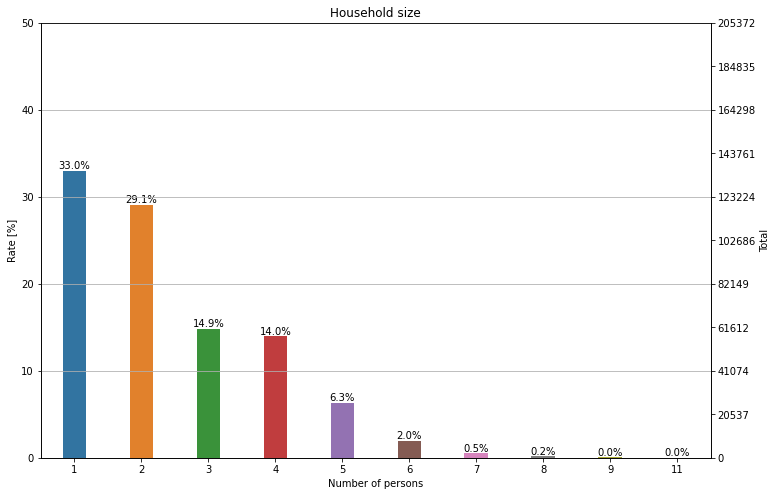

In [16]:
ncount = len(df_household_recovery)

plt.figure(figsize=(12,8))
ax=sns.countplot(x='household_size', data=df_household_recovery)

plt.title('Household size')
plt.xlabel('Number of persons')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2)
ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .35)

plt.savefig('householdSize.pdf')

In [17]:
df_household_recovery.loc[df_household_recovery["household_size_class"] == 0, "household_size_class"] = "1"
df_household_recovery.loc[df_household_recovery["household_size_class"] == 1, "household_size_class"] = "2-3"
df_household_recovery.loc[df_household_recovery["household_size_class"] == 2, "household_size_class"] = "4+"

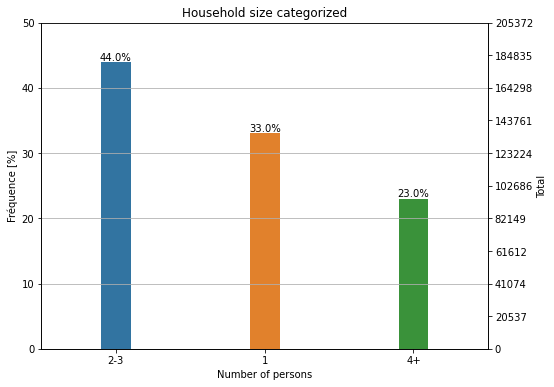

In [18]:
ncount = len(df_household_recovery)

plt.figure(figsize=(8,6))
ax=sns.countplot(x='household_size_class', data=df_household_recovery)

plt.title('Household size categorized')
plt.xlabel('Number of persons')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2)
ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)

plt.savefig('household_size_class.pdf')

#### Motorisation des ménages

In [19]:
NUMBER_OF_VEHICLES_BOUNDS = [0, 1, 2, np.inf]
NUMBER_OF_VEHICLES_LABELS = ["0", "1", "2", "3+"]
df_household_recovery["number_of_vehicles_class"] = np.digitize(df_household_recovery["number_of_vehicles"], NUMBER_OF_VEHICLES_BOUNDS, right = True)

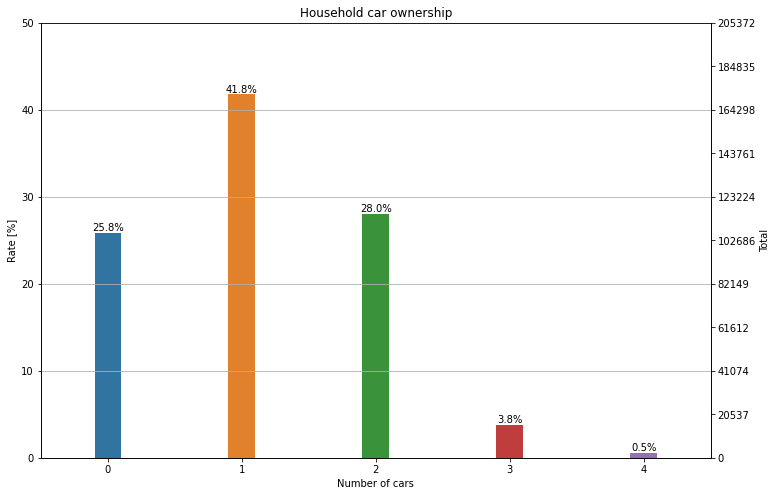

In [20]:
ncount = len(df_household_recovery)

plt.figure(figsize=(12,8))
ax=sns.countplot(x='number_of_vehicles', data=df_household_recovery)

plt.title('Household car ownership')
plt.xlabel('Number of cars')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2)
ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)

plt.savefig('householdCarOwnership.pdf')

In [21]:
df_household_recovery.loc[df_household_recovery["number_of_vehicles_class"] == 0, "number_of_vehicles_class"] = "0"
df_household_recovery.loc[df_household_recovery["number_of_vehicles_class"] == 1, "number_of_vehicles_class"] = "1"
df_household_recovery.loc[df_household_recovery["number_of_vehicles_class"] == 2, "number_of_vehicles_class"] = "2"
df_household_recovery.loc[df_household_recovery["number_of_vehicles_class"] == 3, "number_of_vehicles_class"] = "3+"

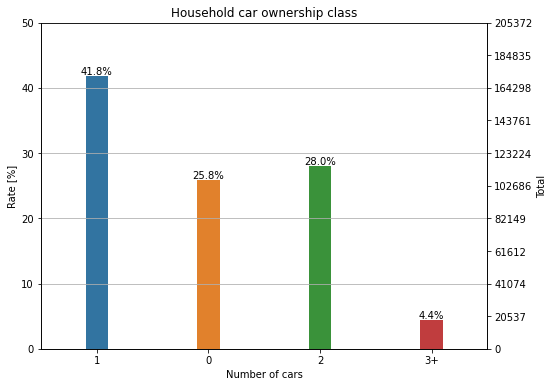

In [22]:
ncount = len(df_household_recovery)

plt.figure(figsize=(8,6))
ax=sns.countplot(x='number_of_vehicles_class', data=df_household_recovery)

plt.title('Household car ownership class')
plt.xlabel('Number of cars')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2)
ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)
plt.savefig('household_car_ownership_class.pdf')

#### Équipements des ménages en vélos

In [23]:
NUMBER_OF_BIKES_BOUNDS = [0, 1, 2, np.inf]
NUMBER_OF_BIKES_LABELS = ["0", "1", "2", "3+"]
df_household_recovery["number_of_bikes_class"] = np.digitize(df_household_recovery["number_of_bikes"], NUMBER_OF_BIKES_BOUNDS, right = True)

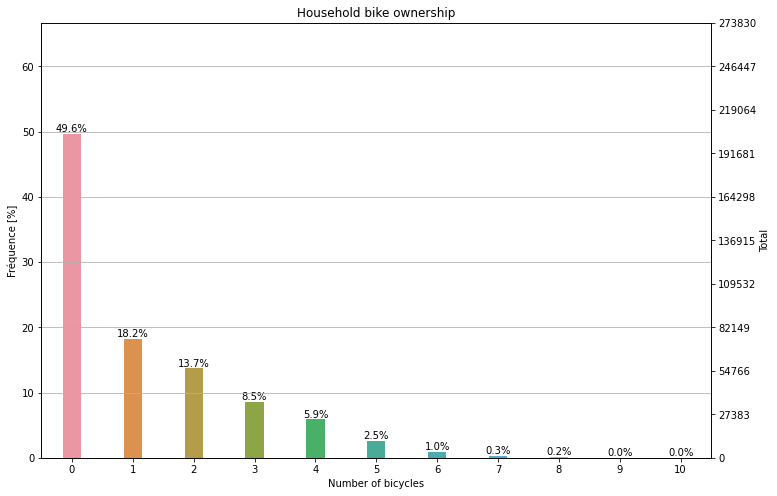

In [24]:
ncount = len(df_household_recovery)

plt.figure(figsize=(12,8))
ax=sns.countplot(x='number_of_bikes', data=df_household_recovery)

plt.title('Household bike ownership')
plt.xlabel('Number of bicycles')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/1.5)
ax.set_ylim(0,ncount/1.5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .3)

plt.savefig('householdBikeOwnership.pdf')

In [25]:
df_household_recovery.loc[df_household_recovery["number_of_bikes_class"] == 0, "number_of_bikes_class"] = "0"
df_household_recovery.loc[df_household_recovery["number_of_bikes_class"] == 1, "number_of_bikes_class"] = "1"
df_household_recovery.loc[df_household_recovery["number_of_bikes_class"] == 2, "number_of_bikes_class"] = "2"
df_household_recovery.loc[df_household_recovery["number_of_bikes_class"] == 3, "number_of_bikes_class"] = "3+"

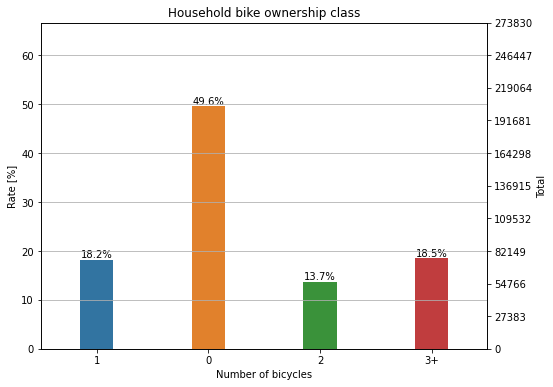

In [26]:
ncount = len(df_household_recovery)

plt.figure(figsize=(8,6))
ax=sns.countplot(x='number_of_bikes_class', data=df_household_recovery)

plt.title('Household bike ownership class')
plt.xlabel('Number of bicycles')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/1.5)
ax.set_ylim(0,ncount/1.5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .3)

plt.savefig('household_bike_ownership_class.pdf')

### Analyse des Caractéristiques de la population

#### Répartition de la population selon le genre et l'âge

In [27]:
AGE_CLASS_PT_BOUNDS = [4, 10, 17, 24, 39, 54, 64, 79, np.inf]
AGE_CLASS_PT_LABELS = ["<5", "5-10", "11-17", "18-24", "25-39", "40-54", "55-64", "65-79" "80+"]
df_persons_recovery["age_class"] = np.digitize(df_persons_recovery["age"], AGE_CLASS_PT_BOUNDS, right = True)

In [28]:
df_persons_recovery.loc[df_persons_recovery["age_class"] == 0, "age_class"] = "5-"
df_persons_recovery.loc[df_persons_recovery["age_class"] == 1, "age_class"] = "5-10"
df_persons_recovery.loc[df_persons_recovery["age_class"] == 2, "age_class"] = "11-17"
df_persons_recovery.loc[df_persons_recovery["age_class"] == 3, "age_class"] = "18-24"
df_persons_recovery.loc[df_persons_recovery["age_class"] == 4, "age_class"] = "25-39"
df_persons_recovery.loc[df_persons_recovery["age_class"] == 5, "age_class"] = "40-54"
df_persons_recovery.loc[df_persons_recovery["age_class"] == 6, "age_class"] = "55-64"
df_persons_recovery.loc[df_persons_recovery["age_class"] == 7, "age_class"] = "65-79"
df_persons_recovery.loc[df_persons_recovery["age_class"] == 8, "age_class"] = "80+"

In [29]:
#AGE_CLASS_BOUNDS = [14, 20, 44, 59, 74, np.inf]
#AGE_CLASS_LABELS = ["<15", "15-20", "21-44", "45-59", "60-74", "75+"]
#df_persons_recovery["age_class"] = np.digitize(df_persons_recovery["age"], AGE_CLASS_BOUNDS, right = True)

In [30]:
#df_persons_recovery.loc[df_persons_recovery["age_class"] == 0, "age_class"] = "<15"
#df_persons_recovery.loc[df_persons_recovery["age_class"] == 1, "age_class"] = "15-20"
#df_persons_recovery.loc[df_persons_recovery["age_class"] == 2, "age_class"] = "21-44"
#df_persons_recovery.loc[df_persons_recovery["age_class"] == 3, "age_class"] = "45-59"
#df_persons_recovery.loc[df_persons_recovery["age_class"] == 4, "age_class"] = "60-74"
#df_persons_recovery.loc[df_persons_recovery["age_class"] == 5, "age_class"] = "75+"

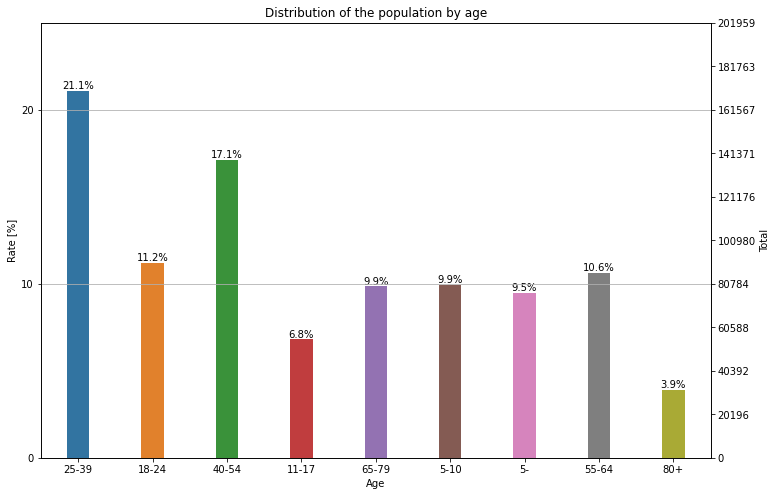

In [31]:
ncount = len(df_persons_recovery)

plt.figure(figsize=(12,8))
ax=sns.countplot(x='age_class', data=df_persons_recovery)

plt.title('Distribution of the population by age')
plt.xlabel('Age')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/4)
ax.set_ylim(0,ncount/4)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .3)

plt.savefig('DistributionPersonsAge.pdf')

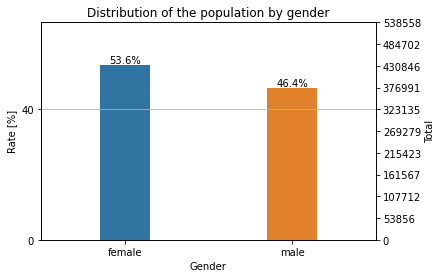

In [32]:
ncount = len(df_persons_recovery)

plt.figure(figsize=(6,4))
ax=sns.countplot(x='sex', data=df_persons_recovery)

plt.title('Distribution of the population by gender')
plt.xlabel('Gender')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/1.5)
ax.set_ylim(0,ncount/1.5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(40))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .3)

plt.savefig('DistributionPersonsGenre.pdf')

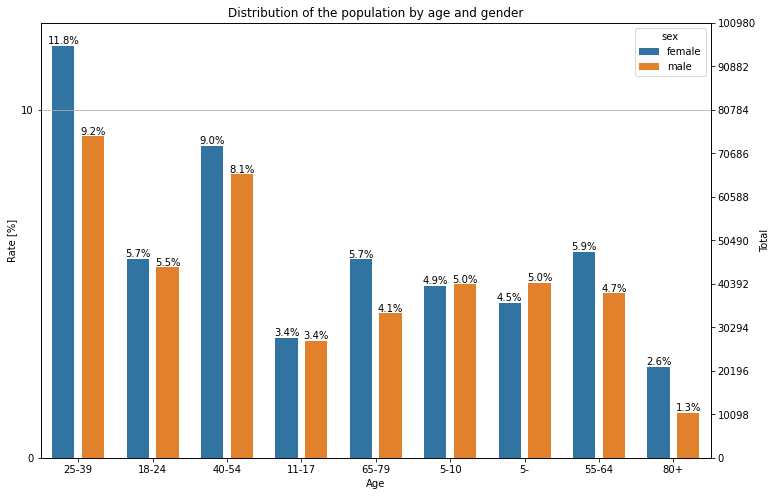

In [33]:
ncount = len(df_persons_recovery)

plt.figure(figsize=(12,8))
ax=sns.countplot(x='age_class', hue="sex", data=df_persons_recovery)

plt.title('Distribution of the population by age and gender')
plt.xlabel('Age')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/8)
ax.set_ylim(0,ncount/8)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .3)

plt.savefig('distribution_persons_age_gender.pdf')

#### Répartition selon l'occupation principale

In [34]:
##1: temps plein,   2: temps partiel et 3: apprentit,
# stage, formation, 4: étudiant, 5: scolaire jusqu'au bac, 6: chomeur, 7: retraité, 8:reste au foyer, 9: autre

In [35]:
df_persons_recovery.loc[df_persons_recovery["professional_occupation"] == 1, "professional_occupation"] = "Full time"
df_persons_recovery.loc[df_persons_recovery["professional_occupation"] == 2, "professional_occupation"] = "Part time"
df_persons_recovery.loc[df_persons_recovery["professional_occupation"] == 3, "professional_occupation"] = "Internship"
df_persons_recovery.loc[df_persons_recovery["professional_occupation"] == 4, "professional_occupation"] = "Student"
df_persons_recovery.loc[df_persons_recovery["professional_occupation"] == 5, "professional_occupation"] = "Pupil"
df_persons_recovery.loc[df_persons_recovery["professional_occupation"] == 6, "professional_occupation"] = "Unemployed"
df_persons_recovery.loc[df_persons_recovery["professional_occupation"] == 7, "professional_occupation"] = "Retiree"
df_persons_recovery.loc[df_persons_recovery["professional_occupation"] == 8, "professional_occupation"] = "Home"
df_persons_recovery.loc[df_persons_recovery["professional_occupation"] == 9, "professional_occupation"] = "Other"

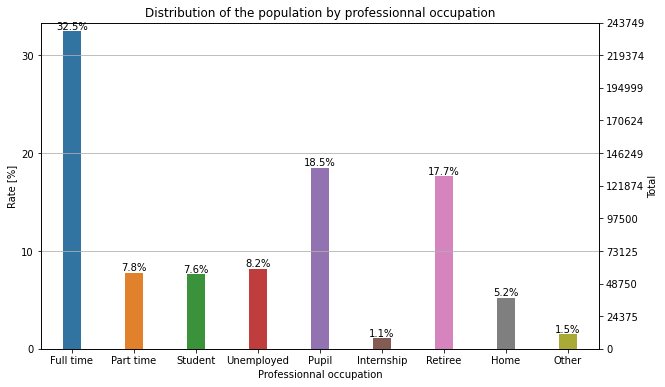

In [36]:
ncount = len(df_persons_recovery[df_persons_recovery["age"]>4])

plt.figure(figsize=(10,6))
ax=sns.countplot(x='professional_occupation', data=df_persons_recovery[df_persons_recovery["age"]>4])

plt.title('Distribution of the population by professionnal occupation')
plt.xlabel('Professionnal occupation')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/3)
ax.set_ylim(0,ncount/3)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .3)
plt.savefig('DistributionPersonsProfessionalOccupation.pdf')

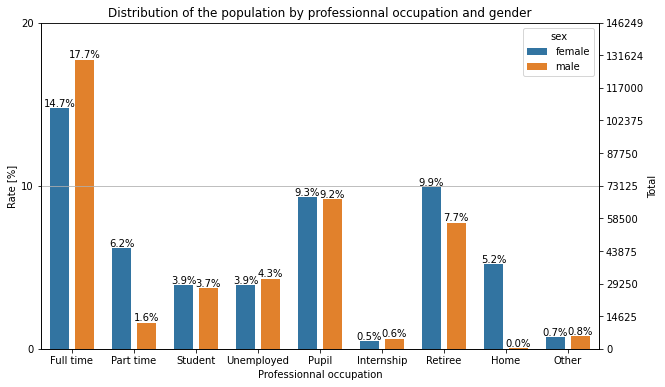

In [37]:
ncount = len(df_persons_recovery[df_persons_recovery["age"]>4])

plt.figure(figsize=(10,6))
ax=sns.countplot(x='professional_occupation', hue='sex', data=df_persons_recovery[df_persons_recovery["age"]>4])

plt.title('Distribution of the population by professionnal occupation and gender')
plt.xlabel('Professionnal occupation')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/5)
ax.set_ylim(0,ncount/5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .3)
plt.savefig('distribution_persons_professional_occupation_gender.pdf')

#### Taux de motorisation par personne

In [38]:
df_persons_recovery.loc[df_persons_recovery["car_availability"] == 0, "car_availability"] = "No"
df_persons_recovery.loc[df_persons_recovery["car_availability"] == 1, "car_availability"] = "Yes"

In [39]:
df_persons_recovery.loc[df_persons_recovery["has_license"] == 0, "has_license"] = "No"
df_persons_recovery.loc[df_persons_recovery["has_license"] == 1, "has_license"] = "Yes"

In [40]:
df_persons_recovery_driving_licence = df_persons_recovery[df_persons_recovery["age"]>17]

In [41]:
df_persons_recovery_driving_licence

,person_id,household_id,age,sex,employed,studies,professional_occupation,has_license,has_pt_subscription,number_of_trips,...,has_parking_place,has_parking_place_problem,walk_use_frequency,car_use_frequency,car_passenger_use_frequency,pt_use_frequency,2RM_use_frequency,bike_use_frequency,rec_person_id,age_class
0,0,1,25,female,True,False,Full time,No,True,4,...,False,NaN,1.0,5.0,2.0,1.0,5.0,4.0,2,25-39
0,1,1,25,female,True,False,Full time,No,True,4,...,False,NaN,1.0,5.0,2.0,1.0,5.0,4.0,2,25-39
0,2,1,25,female,True,False,Full time,No,True,4,...,False,NaN,1.0,5.0,2.0,1.0,5.0,4.0,2,25-39
0,3,1,25,female,True,False,Full time,No,True,4,...,False,NaN,1.0,5.0,2.0,1.0,5.0,4.0,2,25-39
0,4,1,25,female,True,False,Full time,No,True,4,...,False,NaN,1.0,5.0,2.0,1.0,5.0,4.0,2,25-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,807741,4538,35,female,True,False,Full time,Yes,False,7,...,True,3.0,1.0,1.0,2.0,3.0,5.0,4.0,10169,25-39
7435,807742,4538,35,female,True,False,Full time,Yes,False,7,...,True,3.0,1.0,1.0,2.0,3.0,5.0,4.0,10169,25-39
7435,807743,4538,35,female,True,False,Full time,Yes,False,7,...,True,3.0,1.0,1.0,2.0,3.0,5.0,4.0,10169,25-39
7435,807744,4538,35,female,True,False,Full time,Yes,False,7,...,True,3.0,1.0,1.0,2.0,3.0,5.0,4.0,10169,25-39


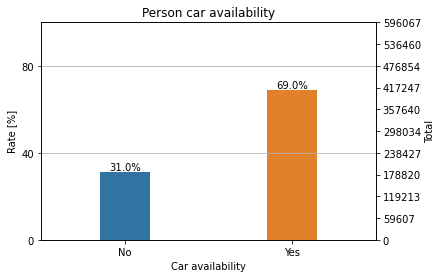

In [42]:
ncount = len(df_persons_recovery_driving_licence)

plt.figure(figsize=(6,4))
ax=sns.countplot(x='car_availability', data=df_persons_recovery_driving_licence)

plt.title('Person car availability')
plt.xlabel('Car availability')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(40))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .3)
plt.savefig('personCarAvailability.pdf')

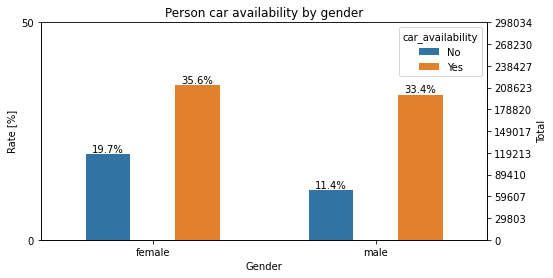

In [43]:
ncount = len(df_persons_recovery_driving_licence)

plt.figure(figsize=(8,4))
ax=sns.countplot(x='sex', hue='car_availability', data=df_persons_recovery_driving_licence)

plt.title('Person car availability by gender')
plt.xlabel('Gender')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2)
ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(50))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)
plt.savefig('personCarAvailabilityByGender.pdf')

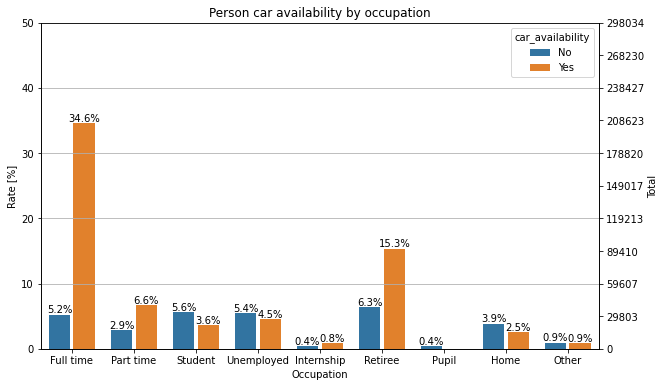

In [44]:
ncount = len(df_persons_recovery_driving_licence)

plt.figure(figsize=(10,6))
ax=sns.countplot(x='professional_occupation', hue='car_availability', data=df_persons_recovery_driving_licence)

plt.title('Person car availability by occupation')
plt.xlabel('Occupation')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2)
ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .35)
plt.savefig('person_car_availability_by_occupation.pdf')

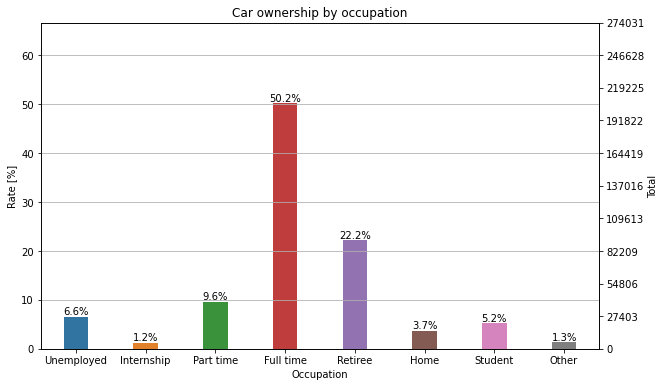

In [45]:
ncount = len(df_persons_recovery_driving_licence[df_persons_recovery_driving_licence["car_availability"]=="Yes"])

plt.figure(figsize=(10,6))
ax=sns.countplot(x='professional_occupation', data=df_persons_recovery_driving_licence[df_persons_recovery_driving_licence["car_availability"]=="Yes"])

plt.title('Car ownership by occupation')
plt.xlabel('Occupation')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/1.5)
ax.set_ylim(0,ncount/1.5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .35)
plt.savefig('car_ownership_by_occupation.pdf')

In [46]:
df_persons_recovery_car_owner_gender= df_persons_recovery_driving_licence[df_persons_recovery_driving_licence["car_availability"]=="Yes"]

In [47]:
df_persons_recovery_car_owner_gender

,person_id,household_id,age,sex,employed,studies,professional_occupation,has_license,has_pt_subscription,number_of_trips,...,has_parking_place,has_parking_place_problem,walk_use_frequency,car_use_frequency,car_passenger_use_frequency,pt_use_frequency,2RM_use_frequency,bike_use_frequency,rec_person_id,age_class
6,286,7,41,female,False,False,Unemployed,Yes,False,14,...,False,NaN,1.0,5.0,5.0,4.0,5.0,5.0,11,40-54
6,287,7,41,female,False,False,Unemployed,Yes,False,14,...,False,NaN,1.0,5.0,5.0,4.0,5.0,5.0,11,40-54
6,288,7,41,female,False,False,Unemployed,Yes,False,14,...,False,NaN,1.0,5.0,5.0,4.0,5.0,5.0,11,40-54
6,289,7,41,female,False,False,Unemployed,Yes,False,14,...,False,NaN,1.0,5.0,5.0,4.0,5.0,5.0,11,40-54
6,290,7,41,female,False,False,Unemployed,Yes,False,14,...,False,NaN,1.0,5.0,5.0,4.0,5.0,5.0,11,40-54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,807741,4538,35,female,True,False,Full time,Yes,False,7,...,True,3.0,1.0,1.0,2.0,3.0,5.0,4.0,10169,25-39
7435,807742,4538,35,female,True,False,Full time,Yes,False,7,...,True,3.0,1.0,1.0,2.0,3.0,5.0,4.0,10169,25-39
7435,807743,4538,35,female,True,False,Full time,Yes,False,7,...,True,3.0,1.0,1.0,2.0,3.0,5.0,4.0,10169,25-39
7435,807744,4538,35,female,True,False,Full time,Yes,False,7,...,True,3.0,1.0,1.0,2.0,3.0,5.0,4.0,10169,25-39


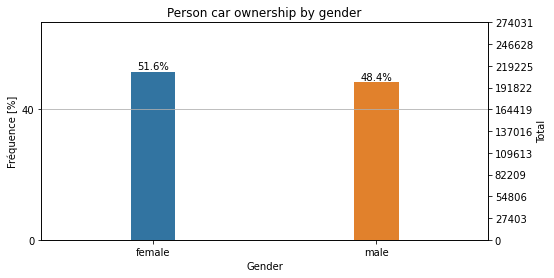

In [48]:
ncount = len(df_persons_recovery_car_owner_gender)

plt.figure(figsize=(8,4))
ax=sns.countplot(x='sex', data=df_persons_recovery_car_owner_gender)

plt.title('Person car ownership by gender')
plt.xlabel('Gender')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/1.5)
ax.set_ylim(0,ncount/1.5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(40))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)
plt.savefig('car_ownership_gender.pdf')

#### Possession du permis de conduire

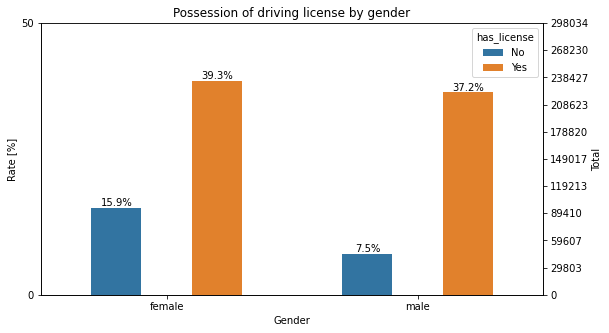

In [49]:
ncount = len(df_persons_recovery_driving_licence)

plt.figure(figsize=(9,5))
ax=sns.countplot(x='sex', hue='has_license', data=df_persons_recovery_driving_licence)

plt.title('Possession of driving license by gender')
plt.xlabel('Gender')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2)
ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(50))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)
plt.savefig('possession_of_driving_license_gender.pdf')

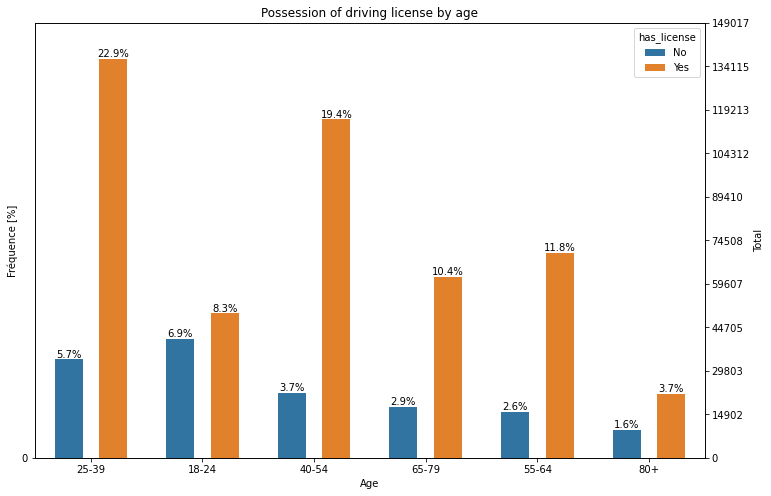

In [50]:
ncount = len(df_persons_recovery_driving_licence)

plt.figure(figsize=(12,8))
ax=sns.countplot(x='age_class', hue='has_license', data=df_persons_recovery_driving_licence)

plt.title('Possession of driving license by age')
plt.xlabel('Age')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/4)
ax.set_ylim(0,ncount/4)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(40))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .25)
plt.savefig('possession_of_driving_license_age.pdf')

In [51]:
df_persons_with_driving_license = df_persons_recovery_driving_licence[df_persons_recovery_driving_licence["has_license"]=="Yes"]

In [52]:
df_persons_with_driving_license

,person_id,household_id,age,sex,employed,studies,professional_occupation,has_license,has_pt_subscription,number_of_trips,...,has_parking_place,has_parking_place_problem,walk_use_frequency,car_use_frequency,car_passenger_use_frequency,pt_use_frequency,2RM_use_frequency,bike_use_frequency,rec_person_id,age_class
2,100,4,23,male,False,True,Student,Yes,True,4,...,False,NaN,1.0,5.0,5.0,1.0,5.0,5.0,5,18-24
2,101,4,23,male,False,True,Student,Yes,True,4,...,False,NaN,1.0,5.0,5.0,1.0,5.0,5.0,5,18-24
2,102,4,23,male,False,True,Student,Yes,True,4,...,False,NaN,1.0,5.0,5.0,1.0,5.0,5.0,5,18-24
2,103,4,23,male,False,True,Student,Yes,True,4,...,False,NaN,1.0,5.0,5.0,1.0,5.0,5.0,5,18-24
2,104,4,23,male,False,True,Student,Yes,True,4,...,False,NaN,1.0,5.0,5.0,1.0,5.0,5.0,5,18-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,807741,4538,35,female,True,False,Full time,Yes,False,7,...,True,3.0,1.0,1.0,2.0,3.0,5.0,4.0,10169,25-39
7435,807742,4538,35,female,True,False,Full time,Yes,False,7,...,True,3.0,1.0,1.0,2.0,3.0,5.0,4.0,10169,25-39
7435,807743,4538,35,female,True,False,Full time,Yes,False,7,...,True,3.0,1.0,1.0,2.0,3.0,5.0,4.0,10169,25-39
7435,807744,4538,35,female,True,False,Full time,Yes,False,7,...,True,3.0,1.0,1.0,2.0,3.0,5.0,4.0,10169,25-39


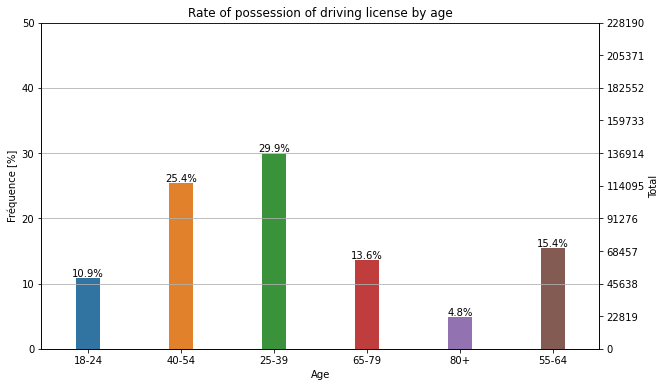

In [53]:
ncount = len(df_persons_recovery_driving_licence[df_persons_recovery_driving_licence["has_license"]=="Yes"])

plt.figure(figsize=(10,6))
ax=sns.countplot(x='age_class', data=df_persons_recovery_driving_licence[df_persons_recovery_driving_licence["has_license"]=="Yes"])

plt.title('Rate of possession of driving license by age')
plt.xlabel('Age')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2)
ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .25)
plt.savefig('rate_possession_of_driving_license_age.pdf')

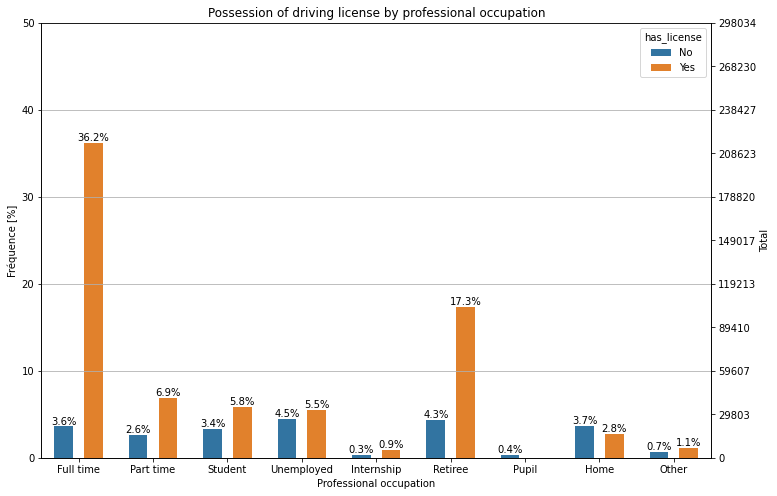

In [54]:
ncount = len(df_persons_recovery_driving_licence)

plt.figure(figsize=(12,8))
ax=sns.countplot(x='professional_occupation', hue='has_license', data=df_persons_recovery_driving_licence)

plt.title('Possession of driving license by professional occupation')
plt.xlabel('Professional occupation')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2)
ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .25)
plt.savefig('possession_of_driving_license_professional_occupation.pdf')

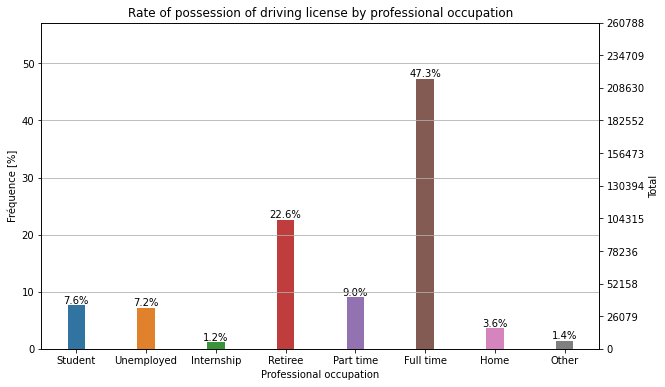

In [55]:
ncount = len(df_persons_recovery_driving_licence[df_persons_recovery_driving_licence["has_license"]=="Yes"])

plt.figure(figsize=(10,6))
ax=sns.countplot(x='professional_occupation', data=df_persons_recovery_driving_licence[df_persons_recovery_driving_licence["has_license"]=="Yes"])

plt.title('Rate of possession of driving license by professional occupation')
plt.xlabel('Professional occupation')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/1.75)
ax.set_ylim(0,ncount/1.75)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .25)
plt.savefig('rate_possession_of_driving_license_professional_occupation.pdf')

<Figure size 864x576 with 0 Axes>

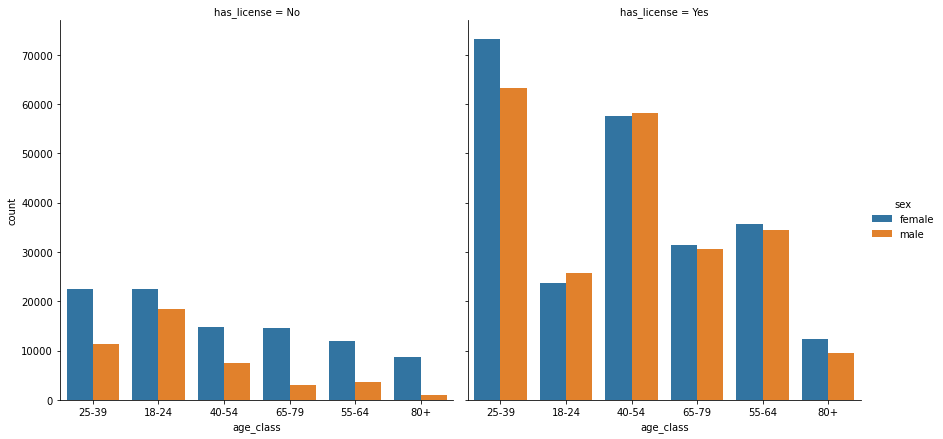

In [56]:
plt.figure(figsize=(12,8))
ax=sns.catplot(x="age_class", hue="sex", col="has_license",
                data=df_persons_recovery_driving_licence, kind="count",
                height=6, aspect=1)

plt.savefig('DrivingLicensePossessionByAgeAndGender.pdf')

<Figure size 864x576 with 0 Axes>

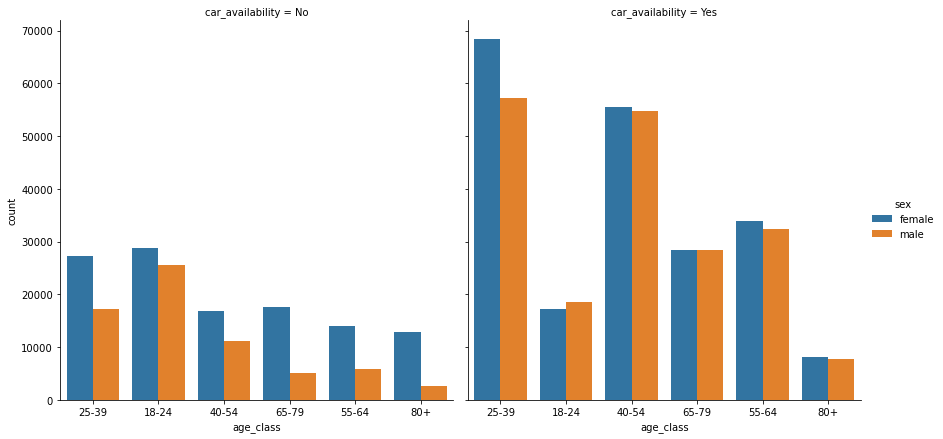

In [57]:
plt.figure(figsize=(12,8))
ax=sns.catplot(x="age_class", hue="sex", col="car_availability",
                data=df_persons_recovery_driving_licence, kind="count",
                height=6, aspect=1)

plt.savefig('carAvailabilityByAgeAndGender.pdf')

#### Possession d'un abonnement aux transports publics

In [58]:
df_persons_recovery.loc[df_persons_recovery["has_pt_subscription"] == 0, "has_pt_subscription"] = "No"
df_persons_recovery.loc[df_persons_recovery["has_pt_subscription"] == 1, "has_pt_subscription"] = "Yes"

In [59]:
df_persons_recovery_pt_subscription = df_persons_recovery[df_persons_recovery["age"]>4]

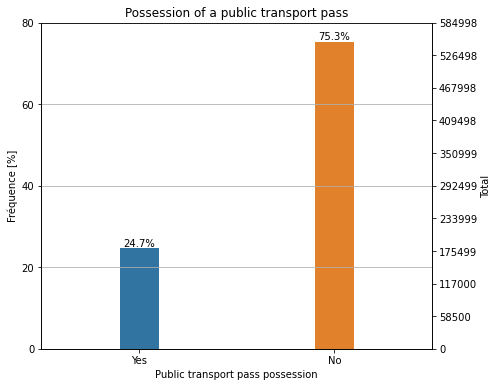

In [60]:
ncount = len(df_persons_recovery_pt_subscription)

plt.figure(figsize=(7,6))
ax=sns.countplot(x='has_pt_subscription', data=df_persons_recovery_pt_subscription)

plt.title('Possession of a public transport pass')
plt.xlabel('Public transport pass possession')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/1.25)
ax.set_ylim(0,ncount/1.25)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(20))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)
plt.savefig('PossessionOfAPublicTransportPass.pdf')

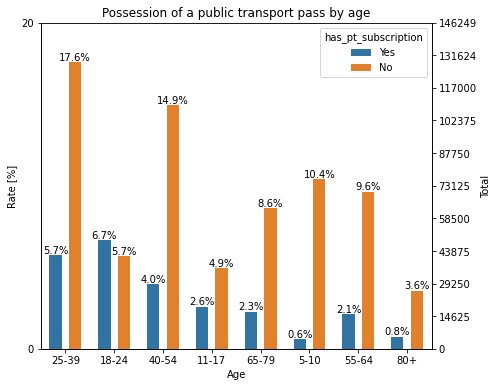

In [61]:
ncount = len(df_persons_recovery_pt_subscription)

plt.figure(figsize=(7,6))
ax=sns.countplot(x='age_class', hue='has_pt_subscription', data=df_persons_recovery_pt_subscription)

plt.title('Possession of a public transport pass by age')
plt.xlabel('Age')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/5)
ax.set_ylim(0,ncount/5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(20))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .25)
plt.savefig('PossessionOfAPublicTransportPass_by_age.pdf')

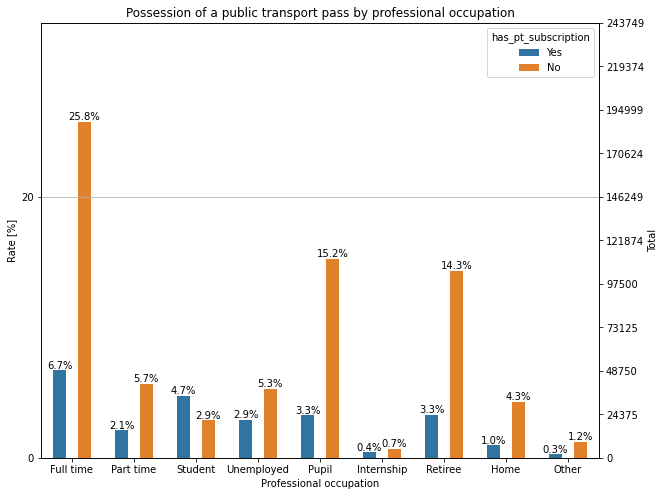

In [62]:
ncount = len(df_persons_recovery_pt_subscription)

plt.figure(figsize=(10,8))
ax=sns.countplot(x='professional_occupation', hue='has_pt_subscription', data=df_persons_recovery_pt_subscription)

plt.title('Possession of a public transport pass by professional occupation')
plt.xlabel('Professional occupation')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/3)
ax.set_ylim(0,ncount/3)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(20))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)
plt.savefig('possession_of_a_pt_pass_by_professional_occupation.pdf')

In [63]:
df_persons_recovery_has_pt_subscription = df_persons_recovery_pt_subscription[df_persons_recovery_pt_subscription["has_pt_subscription"]=="Yes"]

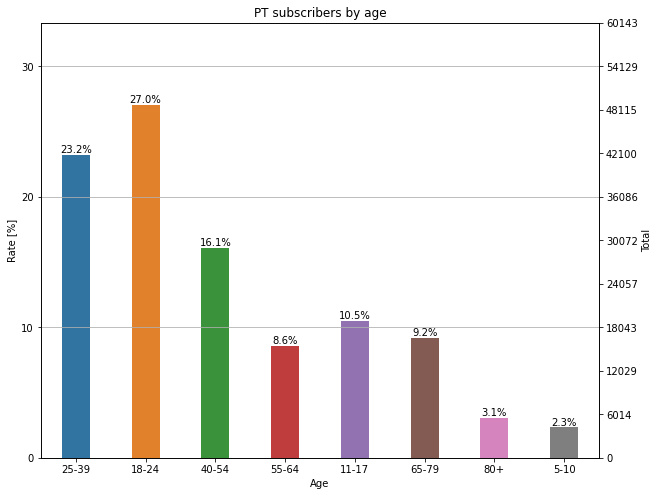

In [64]:
ncount = len(df_persons_recovery_has_pt_subscription)

plt.figure(figsize=(10,8))
ax=sns.countplot(x='age_class', data=df_persons_recovery_has_pt_subscription)

plt.title('PT subscribers by age')
plt.xlabel('Age')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/3)
ax.set_ylim(0,ncount/3)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .4)
plt.savefig('PT_subscribers_by_age.pdf')

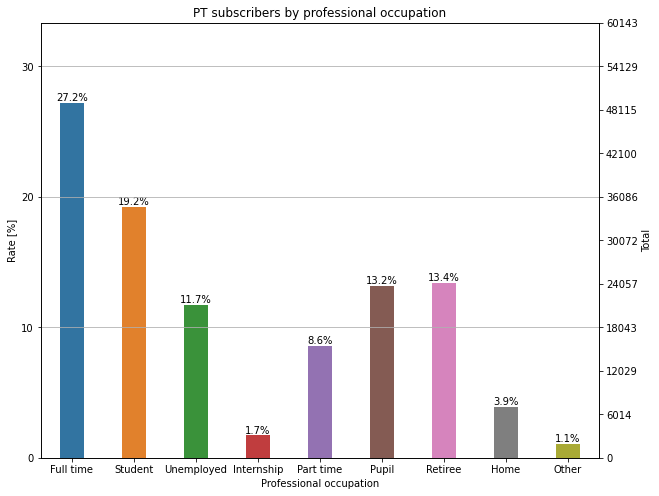

In [65]:
ncount = len(df_persons_recovery_has_pt_subscription)

plt.figure(figsize=(10,8))
ax=sns.countplot(x='professional_occupation', data=df_persons_recovery_has_pt_subscription)

plt.title('PT subscribers by professional occupation')
plt.xlabel('Professional occupation')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/3)
ax.set_ylim(0,ncount/3)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .4)
plt.savefig('PT_subscribers_by_professional_occupation.pdf')

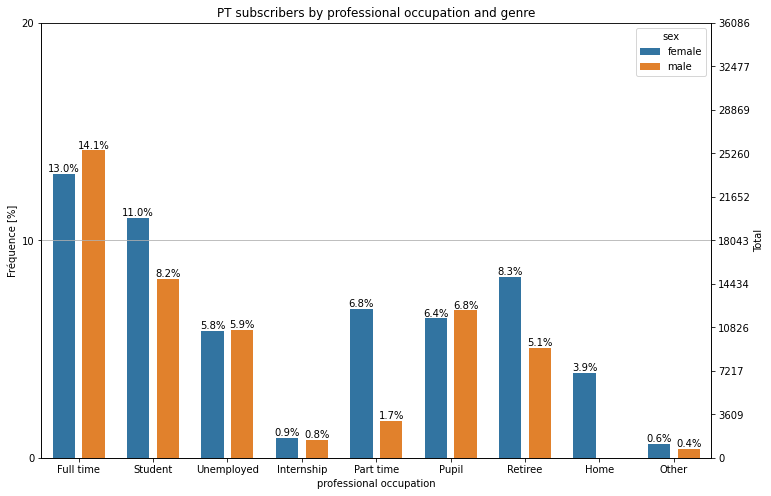

In [66]:
ncount = len(df_persons_recovery_has_pt_subscription)

plt.figure(figsize=(12,8))
ax=sns.countplot(x='professional_occupation', hue='sex', data=df_persons_recovery_has_pt_subscription)

plt.title('PT subscribers by professional occupation and genre')
plt.xlabel('professional occupation')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/5)
ax.set_ylim(0,ncount/5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .3)
plt.savefig('PT_subscribers_by_professional_occupation_and_genre.pdf')

#### Lieu de travail

In [67]:
df_persons_recovery.loc[df_persons_recovery["use_car_to_go_work_study"] == 1, "use_car_to_go_work_study"] = "Yes, totally"
df_persons_recovery.loc[df_persons_recovery["use_car_to_go_work_study"] == 2, "use_car_to_go_work_study"] = "Yes, partially"
df_persons_recovery.loc[df_persons_recovery["use_car_to_go_work_study"] == 3, "use_car_to_go_work_study"] = "Yes, not used"
df_persons_recovery.loc[df_persons_recovery["use_car_to_go_work_study"] == 4, "use_car_to_go_work_study"] = "No"

In [68]:
df_persons_recovery["has_parking_place_problem"] = df_persons_recovery["has_parking_place_problem"].fillna(5)
df_persons_recovery

,person_id,household_id,age,sex,employed,studies,professional_occupation,has_license,has_pt_subscription,number_of_trips,...,has_parking_place,has_parking_place_problem,walk_use_frequency,car_use_frequency,car_passenger_use_frequency,pt_use_frequency,2RM_use_frequency,bike_use_frequency,rec_person_id,age_class
0,0,1,25,female,True,False,Full time,No,Yes,4,...,False,5.0,1.0,5.0,2.0,1.0,5.0,4.0,2,25-39
0,1,1,25,female,True,False,Full time,No,Yes,4,...,False,5.0,1.0,5.0,2.0,1.0,5.0,4.0,2,25-39
0,2,1,25,female,True,False,Full time,No,Yes,4,...,False,5.0,1.0,5.0,2.0,1.0,5.0,4.0,2,25-39
0,3,1,25,female,True,False,Full time,No,Yes,4,...,False,5.0,1.0,5.0,2.0,1.0,5.0,4.0,2,25-39
0,4,1,25,female,True,False,Full time,No,Yes,4,...,False,5.0,1.0,5.0,2.0,1.0,5.0,4.0,2,25-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7436,807832,4538,1,male,False,False,Other,No,No,0,...,False,5.0,NaN,NaN,NaN,NaN,NaN,NaN,10170,5-
7436,807833,4538,1,male,False,False,Other,No,No,0,...,False,5.0,NaN,NaN,NaN,NaN,NaN,NaN,10170,5-
7436,807834,4538,1,male,False,False,Other,No,No,0,...,False,5.0,NaN,NaN,NaN,NaN,NaN,NaN,10170,5-
7436,807835,4538,1,male,False,False,Other,No,No,0,...,False,5.0,NaN,NaN,NaN,NaN,NaN,NaN,10170,5-


In [69]:
df_persons_recovery.loc[df_persons_recovery["has_parking_place_problem"] == 1, "has_parking_place_problem"] = "Yes"
df_persons_recovery.loc[df_persons_recovery["has_parking_place_problem"] == 2, "has_parking_place_problem"] = "No, free"
df_persons_recovery.loc[df_persons_recovery["has_parking_place_problem"] == 3, "has_parking_place_problem"] = "No, paying"
df_persons_recovery.loc[df_persons_recovery["has_parking_place_problem"] == 4, "has_parking_place_problem"] = "No, free"
df_persons_recovery.loc[df_persons_recovery["has_parking_place_problem"] == 5, "has_parking_place_problem"] = "No info"

In [70]:
df_persons_recovery.loc[df_persons_recovery["work_home"] == 0, "work_home"] = "No"
df_persons_recovery.loc[df_persons_recovery["work_home"] == 1, "work_home"] = "Yes"

In [71]:
df_persons_working = df_persons_recovery[df_persons_recovery["employed"]==1]
df_persons_working

,person_id,household_id,age,sex,employed,studies,professional_occupation,has_license,has_pt_subscription,number_of_trips,...,has_parking_place,has_parking_place_problem,walk_use_frequency,car_use_frequency,car_passenger_use_frequency,pt_use_frequency,2RM_use_frequency,bike_use_frequency,rec_person_id,age_class
0,0,1,25,female,True,False,Full time,No,Yes,4,...,False,No info,1.0,5.0,2.0,1.0,5.0,4.0,2,25-39
0,1,1,25,female,True,False,Full time,No,Yes,4,...,False,No info,1.0,5.0,2.0,1.0,5.0,4.0,2,25-39
0,2,1,25,female,True,False,Full time,No,Yes,4,...,False,No info,1.0,5.0,2.0,1.0,5.0,4.0,2,25-39
0,3,1,25,female,True,False,Full time,No,Yes,4,...,False,No info,1.0,5.0,2.0,1.0,5.0,4.0,2,25-39
0,4,1,25,female,True,False,Full time,No,Yes,4,...,False,No info,1.0,5.0,2.0,1.0,5.0,4.0,2,25-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,807741,4538,35,female,True,False,Full time,Yes,No,7,...,True,"No, paying",1.0,1.0,2.0,3.0,5.0,4.0,10169,25-39
7435,807742,4538,35,female,True,False,Full time,Yes,No,7,...,True,"No, paying",1.0,1.0,2.0,3.0,5.0,4.0,10169,25-39
7435,807743,4538,35,female,True,False,Full time,Yes,No,7,...,True,"No, paying",1.0,1.0,2.0,3.0,5.0,4.0,10169,25-39
7435,807744,4538,35,female,True,False,Full time,Yes,No,7,...,True,"No, paying",1.0,1.0,2.0,3.0,5.0,4.0,10169,25-39


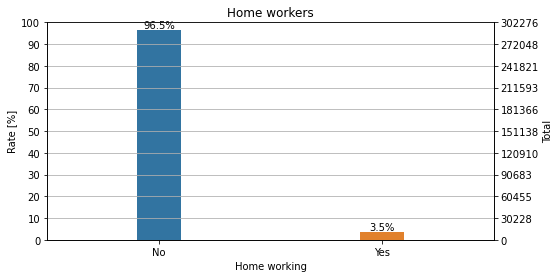

In [72]:
ncount = len(df_persons_working)

plt.figure(figsize=(8,4))
ax=sns.countplot(x='work_home', data=df_persons_working)

plt.title('Home workers')
plt.xlabel('Home working')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)
plt.savefig('home_working.pdf')

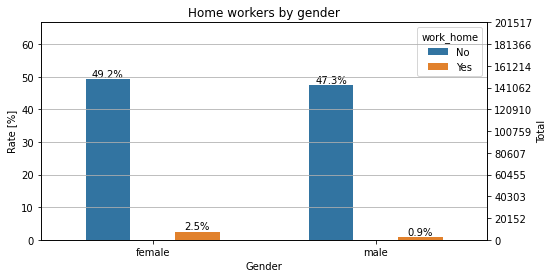

In [73]:
ncount = len(df_persons_working)

plt.figure(figsize=(8,4))
ax=sns.countplot(x="sex", hue='work_home', data=df_persons_working)

plt.title('Home workers by gender')
plt.xlabel('Gender')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/1.5)
ax.set_ylim(0,ncount/1.5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)
plt.savefig('home_working_gender.pdf')

#### Moyens de transport pour se rendre au travail

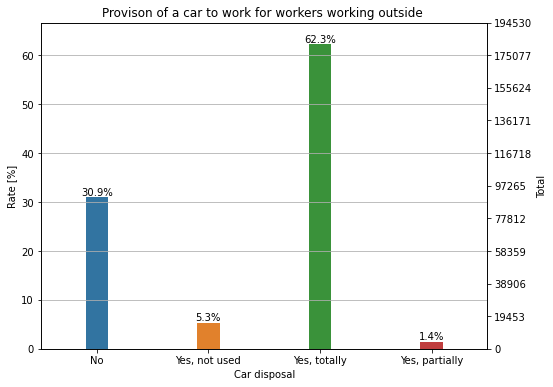

In [74]:
##Using the car to get to work for workers working outside 
ncount = len(df_persons_working[df_persons_working["work_home"] == "No"])

plt.figure(figsize=(8,6))
ax=sns.countplot(x='use_car_to_go_work_study', data=df_persons_working[df_persons_working["work_home"] == "No"])

plt.title('Provison of a car to work for workers working outside ')
plt.xlabel('Car disposal')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/1.5)
ax.set_ylim(0,ncount/1.5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)
plt.savefig('provision_car_to_work.pdf')

In [75]:
#Les pratiques de rabattement en voiture vers une gare, un parking relais ou une aire de covoiturage sont très faibles (environ 1,7 % des actifs en tout soit environ 2 659 personnes).

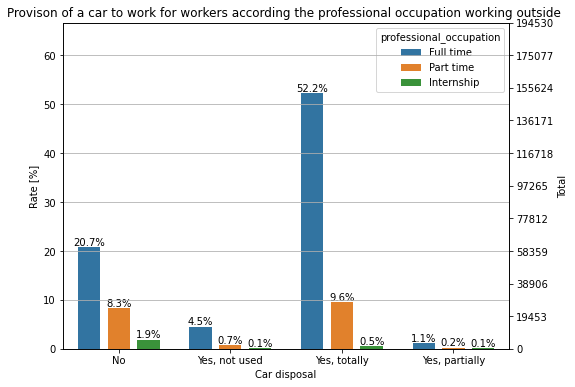

In [76]:
##Using the car to get to work for workers working outside 
ncount = len(df_persons_working[df_persons_working["work_home"] == "No"])

plt.figure(figsize=(8,6))
ax=sns.countplot(x='use_car_to_go_work_study', hue="professional_occupation", data=df_persons_working[df_persons_working["work_home"] == "No"])

plt.title('Provison of a car to work for workers according the professional occupation working outside ')
plt.xlabel('Car disposal')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/1.5)
ax.set_ylim(0,ncount/1.5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)
plt.savefig('provision_car_to_work_professional_occupation.pdf')

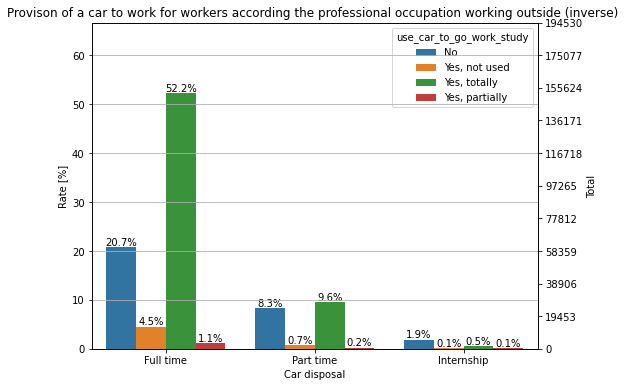

In [77]:
##Using the car to get to work for workers working outside 
ncount = len(df_persons_working[df_persons_working["work_home"] == "No"])

plt.figure(figsize=(8,6))
ax=sns.countplot(x='professional_occupation', hue="use_car_to_go_work_study", data=df_persons_working[df_persons_working["work_home"] == "No"])

plt.title('Provison of a car to work for workers according the professional occupation working outside (inverse) ')
plt.xlabel('Car disposal')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/1.5)
ax.set_ylim(0,ncount/1.5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)
plt.savefig('provision_car_to_work_professional_occupation_inverse.pdf')

In [78]:
#To do : Utilisation de la voiture par rapport à la distance home-work
#Categoriser les distances

In [79]:
#To do : Déplacement vers le travail des actifs selon le lieu de travail
#Autre
#Pas de Calais
#Nord
#Belgique

#Territoire Roubaisien
#Territoire Tourquenois
#Vallée de la Lys
#Weppes
#Couronne Sud de Lille
#Territoire Est
#Couronne Nord de Lille
#Territoir Lillois

#### Difficultés de stationnement sur le lieu de travail

In [80]:
#La problématique du stationnement sur le lieu de travail est réputée pour être l'un des grands
#leviers du changement des habitudes de déplacements : s’il existe des difficultés des
#stationnements à destination, l’usage de la voiture sera plus faible. 

In [81]:
df_persons_working.loc[df_persons_working["has_parking_place"] == 0, "has_parking_place"] = "No"
df_persons_working.loc[df_persons_working["has_parking_place"] == 1, "has_parking_place"] = "Yes"

C:\Users\azise.oumar.diallo\Miniconda3\envs\.env3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


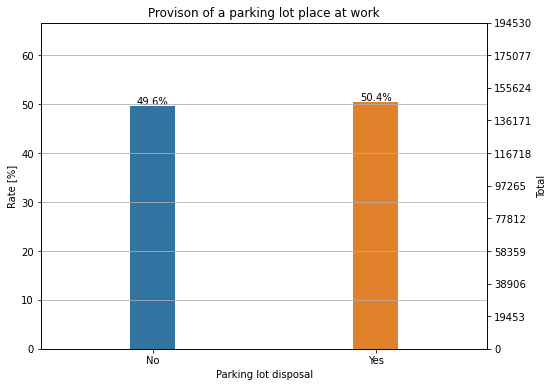

In [82]:
##Using the car to get to work for workers working outside 
ncount = len(df_persons_working[df_persons_working["work_home"] == "No"])

plt.figure(figsize=(8,6))
ax=sns.countplot(x='has_parking_place', data=df_persons_working[df_persons_working["work_home"] == "No"])

plt.title('Provison of a parking lot place at work')
plt.xlabel('Parking lot disposal')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/1.5)
ax.set_ylim(0,ncount/1.5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)
plt.savefig('provision_parking_work.pdf')

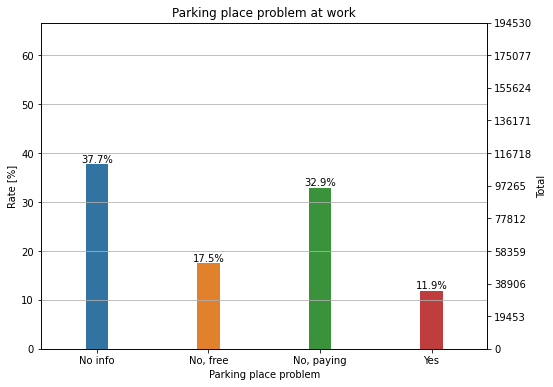

In [83]:
##Using the car to get to work for workers working outside 
ncount = len(df_persons_working[df_persons_working["work_home"] == "No"])

plt.figure(figsize=(8,6))
ax=sns.countplot(x='has_parking_place_problem', data=df_persons_working[df_persons_working["work_home"] == "No"])

plt.title('Parking place problem at work')
plt.xlabel('Parking place problem')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/1.5)
ax.set_ylim(0,ncount/1.5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)
plt.savefig('parking_place_problem_work.pdf')

### Fréquence d’usage des modes

### Analyse des données des déplacements

#### Nombre de déplacements par personne

In [84]:
NUMBER_OF_TRIPS_BOUNDS = [0, 1, 2, np.inf]
NUMBER_OF_TRIPS_LABELS = ["0", "1", "2", "3+"]
df_persons_recovery_pt_subscription["number_of_trips_class"] = np.digitize(df_persons_recovery_pt_subscription["number_of_trips"], NUMBER_OF_TRIPS_BOUNDS, right = True)

<ipython-input-84-bb2f20f2333d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_persons_recovery_pt_subscription["number_of_trips_class"] = np.digitize(df_persons_recovery_pt_subscription["number_of_trips"], NUMBER_OF_TRIPS_BOUNDS, right = True)


In [85]:
df_persons_recovery_pt_subscription.loc[df_persons_recovery_pt_subscription["number_of_trips_class"] == 0, "number_of_trips_class"] = "0"
df_persons_recovery_pt_subscription.loc[df_persons_recovery_pt_subscription["number_of_trips_class"] == 1, "number_of_trips_class"] = "1"
df_persons_recovery_pt_subscription.loc[df_persons_recovery_pt_subscription["number_of_trips_class"] == 2, "number_of_trips_class"] = "2"
df_persons_recovery_pt_subscription.loc[df_persons_recovery_pt_subscription["number_of_trips_class"] == 3, "number_of_trips_class"] = "3+"

C:\Users\azise.oumar.diallo\Miniconda3\envs\.env3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


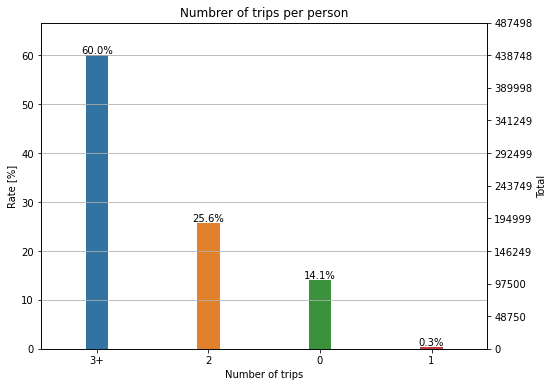

In [86]:
ncount = len(df_persons_recovery_pt_subscription)

plt.figure(figsize=(8,6))
ax=sns.countplot(x='number_of_trips_class', data=df_persons_recovery_pt_subscription)

plt.title('Numbrer of trips per person')
plt.xlabel('Number of trips')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/1.5)
ax.set_ylim(0,ncount/1.5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)
plt.savefig('number_trips_person.pdf')

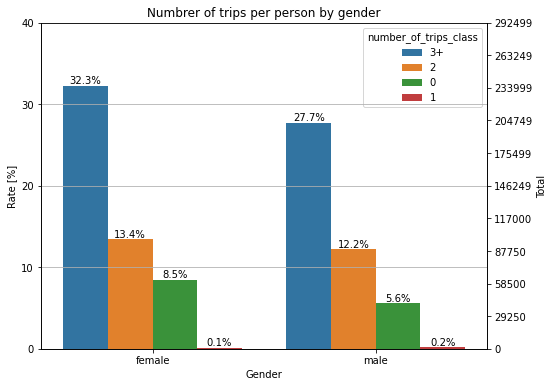

In [87]:
ncount = len(df_persons_recovery_pt_subscription)

plt.figure(figsize=(8,6))
ax=sns.countplot(x="sex", hue='number_of_trips_class', data=df_persons_recovery_pt_subscription)

plt.title('Numbrer of trips per person by gender')
plt.xlabel('Gender')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2.5)
ax.set_ylim(0,ncount/2.5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)
plt.savefig('number_trips_person_gender.pdf')

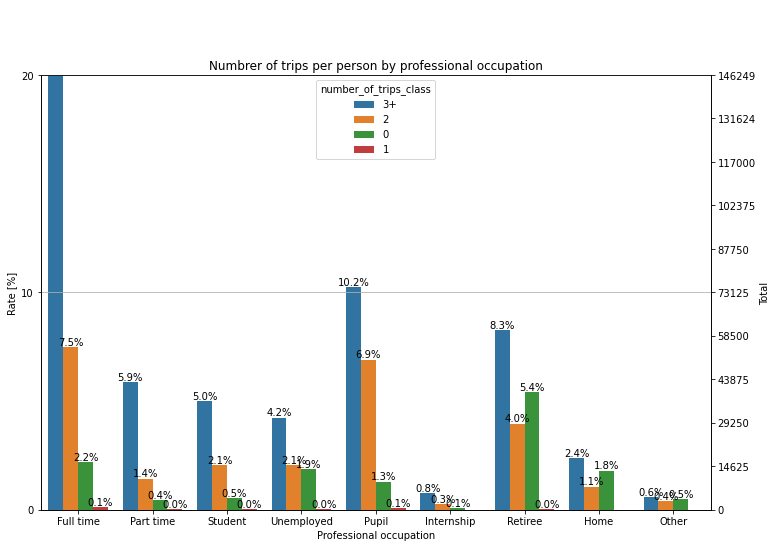

In [88]:
ncount = len(df_persons_recovery_pt_subscription)

plt.figure(figsize=(12,8))
ax=sns.countplot(x="professional_occupation", hue='number_of_trips_class', data=df_persons_recovery_pt_subscription)

plt.title('Numbrer of trips per person by professional occupation')
plt.xlabel('Professional occupation')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/5)
ax.set_ylim(0,ncount/5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)
plt.savefig('number_trips_person_professional_occupation.pdf')

#### Nombre de déplacements par mode principal de transport

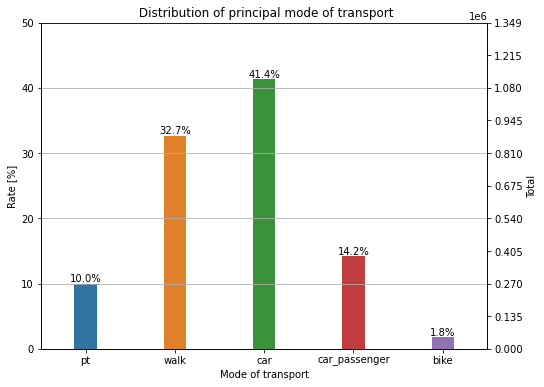

In [89]:
ncount = len(df_trips_recovery)

plt.figure(figsize=(8,6))
ax=sns.countplot(x='mode', data=df_trips_recovery)

plt.title(' Distribution of principal mode of transport')
plt.xlabel('Mode of transport')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2)
ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .25)
plt.savefig('DisDepMPT.pdf')

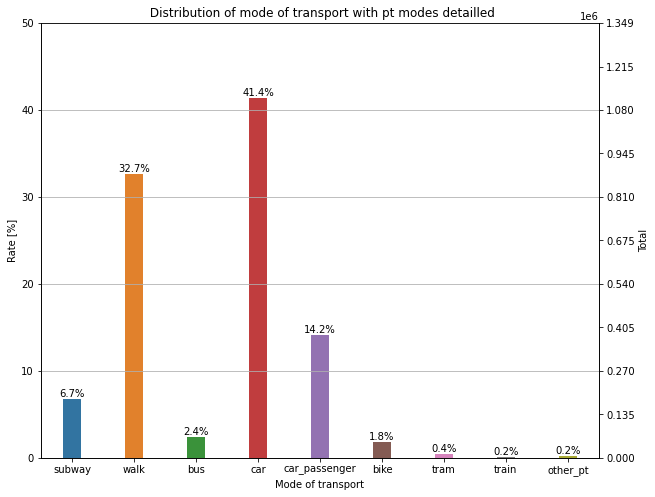

In [90]:
ncount = len(df_trips_recovery)

plt.figure(figsize=(10,8))
ax=sns.countplot(x='mode_detailled', data=df_trips_recovery)

plt.title(' Distribution of mode of transport with pt modes detailled')
plt.xlabel('Mode of transport')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2)
ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .3)
plt.savefig('distribution_mode_detailled.pdf')

Les parts modales représentent la proportion des déplacements qui sont réalisés selon leur mode principal. 
La longueur ou la durée des déplacements n'est pas prise en compte dans ce calcul. 
On peut faire les principales observations suivantes sur les déplacements réalisés quotidiennement :
+ Le principal mode de déplacement utilisé par les habitants de 5 ans et plus de la MEL en semaine est la voiture en tant que conducteur avec plus de 41% des déplacements
+ La marche est le deuxième mode de déplacement des métropolitains, avec 32,7% des déplacements
+ La voiture en tant que passager représente 14,2% des déplacements
+ Le réseau des transports en commun (Bus, Tram, Métro) supporte près de 10% déplacements par jour avec plus d'utilisation du métro
+ Enfin, le vélo avec 1,8% de part modale, est le dernier mode au-dessus du seuil symbolique des 1% 

#### Mobilité selon les caractéristiques des personnes

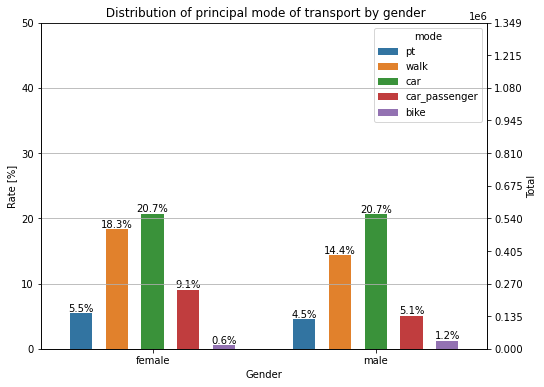

In [91]:
#Selon le genre
ncount = len(df_trips_recovery)

plt.figure(figsize=(8,6))
ax=sns.countplot(x='sex', hue='mode', data=df_trips_recovery)

plt.title(' Distribution of principal mode of transport by gender')
plt.xlabel('Gender')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2)
ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .1)
plt.savefig('distribution_mode_by_gender.pdf')

Les hommes utilisent principalement la voiture en tant que conducteur. Ce déficit de mobilité est compensé par de la voiture en tant que passager, Transpole et la marche.
Les hommes utilisent peu mais cependant beaucoup plus que les femmes les deux-roues motorisés et le vélo (0,12 déplacements pour les hommes contre 0,06 déplacements pour les femmes). 

In [92]:
#Non valide car les ids ont changé
#df_trips_recovery = pd.merge(df_trips_recovery, df_persons_recovery[["person_id", "age_class"]], on = "person_id", how="left")

In [93]:
df_trips_recovery["age_class"] = np.digitize(df_trips_recovery["age"], AGE_CLASS_PT_BOUNDS, right = True)

In [94]:
df_trips_recovery.loc[df_trips_recovery["age_class"] == 0, "age_class"] = "5-"
df_trips_recovery.loc[df_trips_recovery["age_class"] == 1, "age_class"] = "5-10"
df_trips_recovery.loc[df_trips_recovery["age_class"] == 2, "age_class"] = "11-17"
df_trips_recovery.loc[df_trips_recovery["age_class"] == 3, "age_class"] = "18-24"
df_trips_recovery.loc[df_trips_recovery["age_class"] == 4, "age_class"] = "25-39"
df_trips_recovery.loc[df_trips_recovery["age_class"] == 5, "age_class"] = "40-54"
df_trips_recovery.loc[df_trips_recovery["age_class"] == 6, "age_class"] = "55-64"
df_trips_recovery.loc[df_trips_recovery["age_class"] == 7, "age_class"] = "65-79"
df_trips_recovery.loc[df_trips_recovery["age_class"] == 8, "age_class"] = "80+"

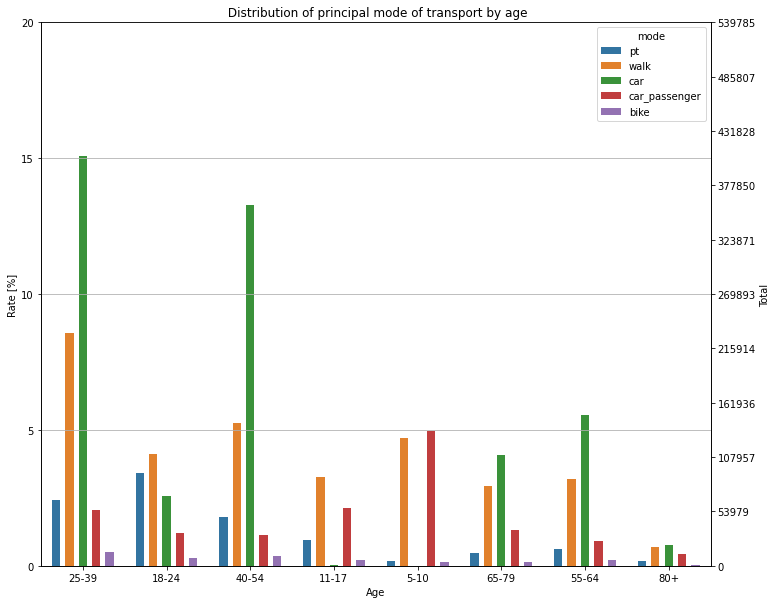

In [95]:
#Selon l'âge 
ncount = len(df_trips_recovery)

plt.figure(figsize=(12,10))
ax=sns.countplot(x='age_class', hue='mode', data=df_trips_recovery)

plt.title(' Distribution of principal mode of transport by age')
plt.xlabel('Age')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    #ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
    #        ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/5)
ax.set_ylim(0,ncount/5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .1)
plt.savefig('distribution_mode_by_age.pdf')

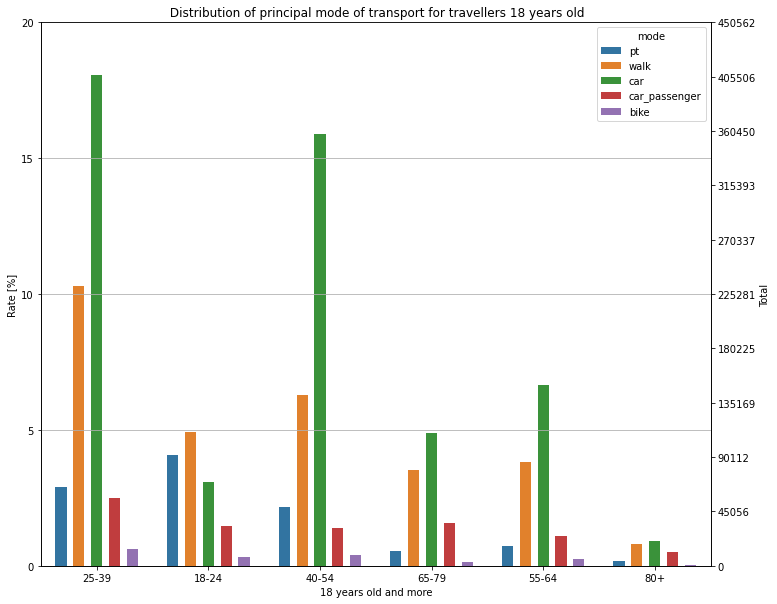

In [96]:
#Selon l'âge 
ncount = len(df_trips_recovery[df_trips_recovery["age"]>17])

plt.figure(figsize=(12,10))
ax=sns.countplot(x='age_class', hue='mode', data=df_trips_recovery[df_trips_recovery["age"]>17])

plt.title(' Distribution of principal mode of transport for travellers 18 years old')
plt.xlabel('18 years old and more')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    #ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
    #        ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/5)
ax.set_ylim(0,ncount/5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .1)
plt.savefig('distribution_mode_by_age_more_18_years.pdf')

Pour les personnes majeures, la part modale de la voiture en tant que conducteur est de 51.4%

In [97]:
df_trips_recovery.loc[df_trips_recovery["professional_occupation"] == 1, "professional_occupation"] = "Full time"
df_trips_recovery.loc[df_trips_recovery["professional_occupation"] == 2, "professional_occupation"] = "Part time"
df_trips_recovery.loc[df_trips_recovery["professional_occupation"] == 3, "professional_occupation"] = "Internship"
df_trips_recovery.loc[df_trips_recovery["professional_occupation"] == 4, "professional_occupation"] = "Student"
df_trips_recovery.loc[df_trips_recovery["professional_occupation"] == 5, "professional_occupation"] = "Pupil"
df_trips_recovery.loc[df_trips_recovery["professional_occupation"] == 6, "professional_occupation"] = "Unemployed"
df_trips_recovery.loc[df_trips_recovery["professional_occupation"] == 7, "professional_occupation"] = "Retiree"
df_trips_recovery.loc[df_trips_recovery["professional_occupation"] == 8, "professional_occupation"] = "Home"
df_trips_recovery.loc[df_trips_recovery["professional_occupation"] == 9, "professional_occupation"] = "Other"

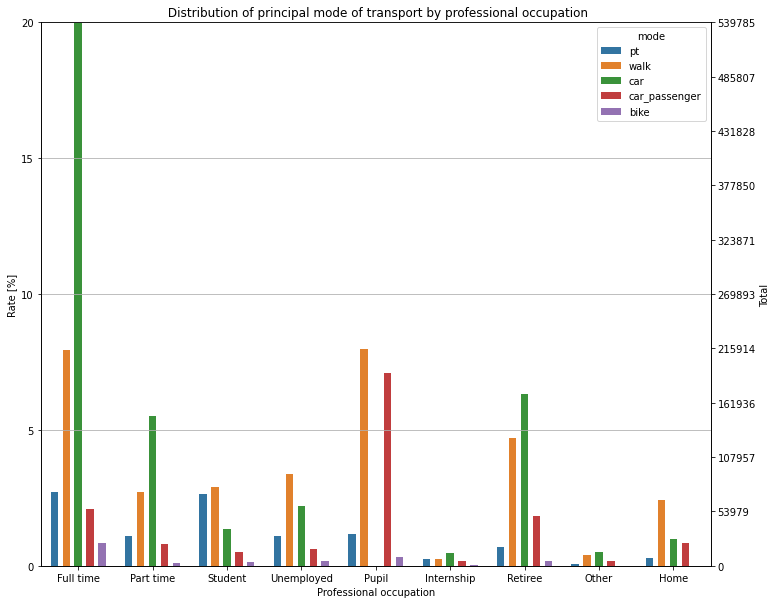

In [98]:
#Selon l'occupation principale
ncount = len(df_trips_recovery)

plt.figure(figsize=(12,10))
ax=sns.countplot(x='professional_occupation', hue='mode', data=df_trips_recovery)

plt.title(' Distribution of principal mode of transport by professional occupation')
plt.xlabel('Professional occupation')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    #ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
    #        ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/5)
ax.set_ylim(0,ncount/5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .1)
plt.savefig('distribution_mode_by_professional_occupation.pdf')

In [99]:
df_trips_recovery.loc[df_trips_recovery["car_availability"] == 0, "car_availability"] = "No"
df_trips_recovery.loc[df_trips_recovery["car_availability"] == 1, "car_availability"] = "Yes"

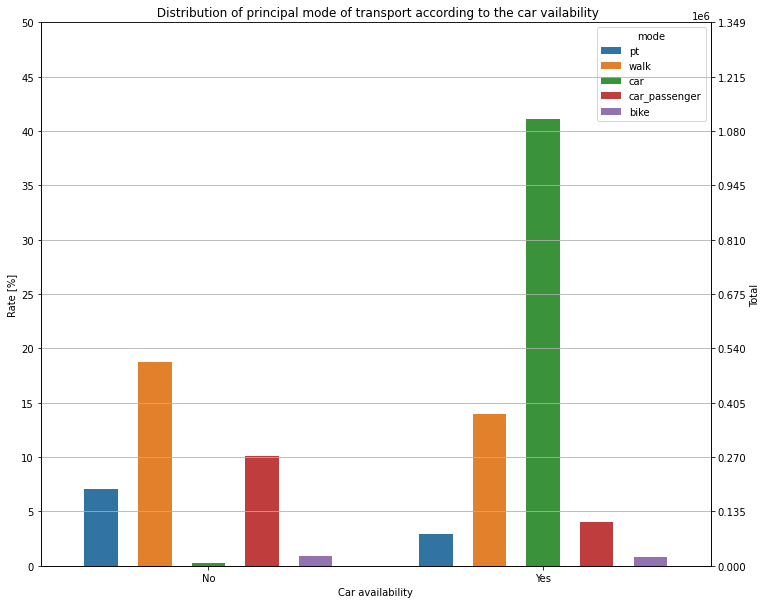

In [100]:
#Selon le taux de motorisation du ménage
ncount = len(df_trips_recovery)

plt.figure(figsize=(12,10))
ax=sns.countplot(x='car_availability', hue='mode', data=df_trips_recovery)

plt.title(' Distribution of principal mode of transport according to the car vailability')
plt.xlabel('Car availability')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    #ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
    #        ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2)
ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .1)
plt.savefig('distribution_mode_car_availability.pdf')

#### Les motifs de déplacements

In [101]:
#Home_Work
f_h_w = df_trips_recovery["preceding_purpose"]=="home"
f_h_w &= df_trips_recovery["following_purpose"]=="work"
f_w_h = df_trips_recovery["preceding_purpose"]=="work"
f_w_h &= df_trips_recovery["following_purpose"]=="home"
f_h_w |= f_w_h
df_trips_h_w= df_trips_recovery[f_h_w]
df_trips_h_w

,person_id,trip_id,departure_time,arrival_time,trip_duration,activity_duration,following_purpose,preceding_purpose,is_last_trip,is_first_trip,...,has_license,car_availability,bike_availability,has_parking_place,has_parking_place_problem,has_pt_subscription,socioprofessional_class,number_of_trips,rec_trip_id,age_class
0,2,0,30600.0,32400.0,1800.0,33300.0,work,home,False,True,...,False,No,True,False,NaN,True,4,4,12,25-39
0,2,1,30600.0,32400.0,1800.0,33300.0,work,home,False,True,...,False,No,True,False,NaN,True,4,4,12,25-39
0,2,2,30600.0,32400.0,1800.0,33300.0,work,home,False,True,...,False,No,True,False,NaN,True,4,4,12,25-39
0,2,3,30600.0,32400.0,1800.0,33300.0,work,home,False,True,...,False,No,True,False,NaN,True,4,4,12,25-39
0,2,4,30600.0,32400.0,1800.0,33300.0,work,home,False,True,...,False,No,True,False,NaN,True,4,4,12,25-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24569,10169,2698719,65400.0,66000.0,600.0,600.0,home,work,False,False,...,True,Yes,True,True,3.0,False,3,7,38177,25-39
24569,10169,2698720,65400.0,66000.0,600.0,600.0,home,work,False,False,...,True,Yes,True,True,3.0,False,3,7,38177,25-39
24569,10169,2698721,65400.0,66000.0,600.0,600.0,home,work,False,False,...,True,Yes,True,True,3.0,False,3,7,38177,25-39
24569,10169,2698722,65400.0,66000.0,600.0,600.0,home,work,False,False,...,True,Yes,True,True,3.0,False,3,7,38177,25-39


In [102]:
#Home-Education
f_h_e = df_trips_recovery["preceding_purpose"]=="home"
f_h_e &= df_trips_recovery["following_purpose"]=="education"
f_e_h = df_trips_recovery["preceding_purpose"]=="education"
f_e_h &= df_trips_recovery["following_purpose"]=="home"
f_h_e |= f_e_h
df_trips_h_e= df_trips_recovery[f_h_e]
df_trips_h_e

,person_id,trip_id,departure_time,arrival_time,trip_duration,activity_duration,following_purpose,preceding_purpose,is_last_trip,is_first_trip,...,has_license,car_availability,bike_availability,has_parking_place,has_parking_place_problem,has_pt_subscription,socioprofessional_class,number_of_trips,rec_trip_id,age_class
13,7,659,32400.0,35100.0,2700.0,22500.0,education,home,False,True,...,True,No,False,False,NaN,False,7,2,33,18-24
13,7,660,32400.0,35100.0,2700.0,22500.0,education,home,False,True,...,True,No,False,False,NaN,False,7,2,33,18-24
13,7,661,32400.0,35100.0,2700.0,22500.0,education,home,False,True,...,True,No,False,False,NaN,False,7,2,33,18-24
13,7,662,32400.0,35100.0,2700.0,22500.0,education,home,False,True,...,True,No,False,False,NaN,False,7,2,33,18-24
13,7,663,32400.0,35100.0,2700.0,22500.0,education,home,False,True,...,True,No,False,False,NaN,False,7,2,33,18-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24535,10156,2694865,45000.0,46800.0,1800.0,NaN,home,education,True,False,...,False,No,True,False,NaN,True,7,2,38116,18-24
24535,10156,2694866,45000.0,46800.0,1800.0,NaN,home,education,True,False,...,False,No,True,False,NaN,True,7,2,38116,18-24
24535,10156,2694867,45000.0,46800.0,1800.0,NaN,home,education,True,False,...,False,No,True,False,NaN,True,7,2,38116,18-24
24535,10156,2694868,45000.0,46800.0,1800.0,NaN,home,education,True,False,...,False,No,True,False,NaN,True,7,2,38116,18-24


In [103]:
#Home-Leisure
f_h_l = df_trips_recovery["preceding_purpose"]=="home"
f_h_l &= df_trips_recovery["following_purpose"]=="leisure"
f_l_h = df_trips_recovery["preceding_purpose"]=="leisure"
f_l_h &= df_trips_recovery["following_purpose"]=="home"
f_h_l |= f_l_h
df_trips_h_l= df_trips_recovery[f_h_l]
df_trips_h_l

,person_id,trip_id,departure_time,arrival_time,trip_duration,activity_duration,following_purpose,preceding_purpose,is_last_trip,is_first_trip,...,has_license,car_availability,bike_availability,has_parking_place,has_parking_place_problem,has_pt_subscription,socioprofessional_class,number_of_trips,rec_trip_id,age_class
3,2,111,74700.0,75600.0,900.0,NaN,home,leisure,True,False,...,False,No,True,False,NaN,True,4,4,15,25-39
3,2,112,74700.0,75600.0,900.0,NaN,home,leisure,True,False,...,False,No,True,False,NaN,True,4,4,15,25-39
3,2,113,74700.0,75600.0,900.0,NaN,home,leisure,True,False,...,False,No,True,False,NaN,True,4,4,15,25-39
3,2,114,74700.0,75600.0,900.0,NaN,home,leisure,True,False,...,False,No,True,False,NaN,True,4,4,15,25-39
3,2,115,74700.0,75600.0,900.0,NaN,home,leisure,True,False,...,False,No,True,False,NaN,True,4,4,15,25-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24555,10166,2697089,94500.0,95400.0,900.0,NaN,home,leisure,True,False,...,True,Yes,True,False,NaN,True,3,4,38155,18-24
24555,10166,2697090,94500.0,95400.0,900.0,NaN,home,leisure,True,False,...,True,Yes,True,False,NaN,True,3,4,38155,18-24
24555,10166,2697091,94500.0,95400.0,900.0,NaN,home,leisure,True,False,...,True,Yes,True,False,NaN,True,3,4,38155,18-24
24555,10166,2697092,94500.0,95400.0,900.0,NaN,home,leisure,True,False,...,True,Yes,True,False,NaN,True,3,4,38155,18-24


In [104]:
#Home-Shop
f_h_s = df_trips_recovery["preceding_purpose"]=="home"
f_h_s &= df_trips_recovery["following_purpose"]=="shop"
f_s_h = df_trips_recovery["preceding_purpose"]=="shop"
f_s_h &= df_trips_recovery["following_purpose"]=="home"
f_h_s |= f_s_h
df_trips_h_s= df_trips_recovery[f_h_s]
df_trips_h_s

,person_id,trip_id,departure_time,arrival_time,trip_duration,activity_duration,following_purpose,preceding_purpose,is_last_trip,is_first_trip,...,has_license,car_availability,bike_availability,has_parking_place,has_parking_place_problem,has_pt_subscription,socioprofessional_class,number_of_trips,rec_trip_id,age_class
17,8,859,62100.0,62400.0,300.0,NaN,home,shop,True,False,...,False,No,False,False,NaN,False,3,3,37,25-39
17,8,860,62100.0,62400.0,300.0,NaN,home,shop,True,False,...,False,No,False,False,NaN,False,3,3,37,25-39
17,8,861,62100.0,62400.0,300.0,NaN,home,shop,True,False,...,False,No,False,False,NaN,False,3,3,37,25-39
17,8,862,62100.0,62400.0,300.0,NaN,home,shop,True,False,...,False,No,False,False,NaN,False,3,3,37,25-39
17,8,863,62100.0,62400.0,300.0,NaN,home,shop,True,False,...,False,No,False,False,NaN,False,3,3,37,25-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24571,10169,2698921,71400.0,72000.0,600.0,NaN,home,shop,True,False,...,True,Yes,True,True,3.0,False,3,7,38179,25-39
24571,10169,2698922,71400.0,72000.0,600.0,NaN,home,shop,True,False,...,True,Yes,True,True,3.0,False,3,7,38179,25-39
24571,10169,2698923,71400.0,72000.0,600.0,NaN,home,shop,True,False,...,True,Yes,True,True,3.0,False,3,7,38179,25-39
24571,10169,2698924,71400.0,72000.0,600.0,NaN,home,shop,True,False,...,True,Yes,True,True,3.0,False,3,7,38179,25-39


In [105]:
#Home-Shop
f_h_o = df_trips_recovery["preceding_purpose"]=="home"
f_h_o &= df_trips_recovery["following_purpose"]=="other"
f_o_h = df_trips_recovery["preceding_purpose"]=="other"
f_o_h &= df_trips_recovery["following_purpose"]=="home"
f_h_o |= f_o_h
df_trips_h_o = df_trips_recovery[f_h_o]
df_trips_h_o

,person_id,trip_id,departure_time,arrival_time,trip_duration,activity_duration,following_purpose,preceding_purpose,is_last_trip,is_first_trip,...,has_license,car_availability,bike_availability,has_parking_place,has_parking_place_problem,has_pt_subscription,socioprofessional_class,number_of_trips,rec_trip_id,age_class
22,11,1044,28200.0,28800.0,600.0,0.0,other,home,False,True,...,True,Yes,True,False,NaN,False,3,14,46,40-54
22,11,1045,28200.0,28800.0,600.0,0.0,other,home,False,True,...,True,Yes,True,False,NaN,False,3,14,46,40-54
22,11,1046,28200.0,28800.0,600.0,0.0,other,home,False,True,...,True,Yes,True,False,NaN,False,3,14,46,40-54
22,11,1047,28200.0,28800.0,600.0,0.0,other,home,False,True,...,True,Yes,True,False,NaN,False,3,14,46,40-54
22,11,1048,28200.0,28800.0,600.0,0.0,other,home,False,True,...,True,Yes,True,False,NaN,False,3,14,46,40-54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24565,10169,2698315,28800.0,29400.0,600.0,300.0,other,home,False,True,...,True,Yes,True,True,3.0,False,3,7,38173,25-39
24565,10169,2698316,28800.0,29400.0,600.0,300.0,other,home,False,True,...,True,Yes,True,True,3.0,False,3,7,38173,25-39
24565,10169,2698317,28800.0,29400.0,600.0,300.0,other,home,False,True,...,True,Yes,True,True,3.0,False,3,7,38173,25-39
24565,10169,2698318,28800.0,29400.0,600.0,300.0,other,home,False,True,...,True,Yes,True,True,3.0,False,3,7,38173,25-39


In [106]:
#Secondary
f_second = df_trips_recovery["preceding_purpose"]!="home"
f_second &= df_trips_recovery["following_purpose"]!="home"
df_trips_second = df_trips_recovery[f_second]
df_trips_second

,person_id,trip_id,departure_time,arrival_time,trip_duration,activity_duration,following_purpose,preceding_purpose,is_last_trip,is_first_trip,...,has_license,car_availability,bike_availability,has_parking_place,has_parking_place_problem,has_pt_subscription,socioprofessional_class,number_of_trips,rec_trip_id,age_class
1,2,37,65700.0,67500.0,1800.0,1200.0,shop,work,False,False,...,False,No,True,False,NaN,True,4,4,13,25-39
1,2,38,65700.0,67500.0,1800.0,1200.0,shop,work,False,False,...,False,No,True,False,NaN,True,4,4,13,25-39
1,2,39,65700.0,67500.0,1800.0,1200.0,shop,work,False,False,...,False,No,True,False,NaN,True,4,4,13,25-39
1,2,40,65700.0,67500.0,1800.0,1200.0,shop,work,False,False,...,False,No,True,False,NaN,True,4,4,13,25-39
1,2,41,65700.0,67500.0,1800.0,1200.0,shop,work,False,False,...,False,No,True,False,NaN,True,4,4,13,25-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24568,10169,2698618,48900.0,49500.0,600.0,15900.0,work,leisure,False,False,...,True,Yes,True,True,3.0,False,3,7,38176,25-39
24568,10169,2698619,48900.0,49500.0,600.0,15900.0,work,leisure,False,False,...,True,Yes,True,True,3.0,False,3,7,38176,25-39
24568,10169,2698620,48900.0,49500.0,600.0,15900.0,work,leisure,False,False,...,True,Yes,True,True,3.0,False,3,7,38176,25-39
24568,10169,2698621,48900.0,49500.0,600.0,15900.0,work,leisure,False,False,...,True,Yes,True,True,3.0,False,3,7,38176,25-39


In [107]:
df_trips_purpose = {"Home-Work":[377314], "Home-Education":[358421], "Home-Leisure":[465181], "Home-Shop":[337928], "Home-Other":[552212], "Secondary":[518386] }
df_trips_purpose = pd.DataFrame(data = df_trips_purpose)

2603801


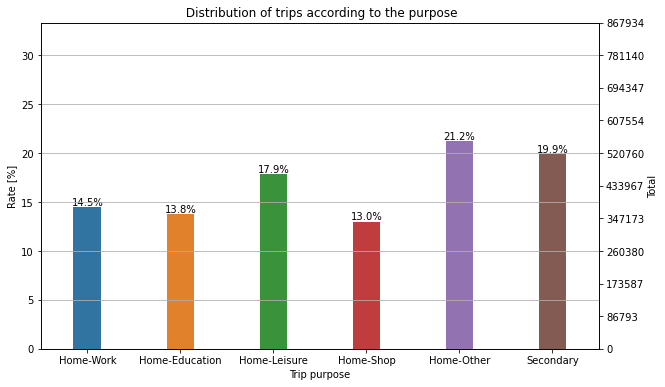

In [108]:
#Motifs combinés
ncount = len(df_trips_h_w) + len(df_trips_h_e) + len(df_trips_h_l) + len(df_trips_h_s) + len(df_trips_h_o) + len(df_trips_second)
print(ncount)
plt.figure(figsize=(10,6))
ax=sns.barplot(data=df_trips_purpose, orient="v")

plt.title(' Distribution of trips according to the purpose')
plt.xlabel('Trip purpose')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/3)
ax.set_ylim(0,ncount/3)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .3)
plt.savefig('distribution_trip_purpose.pdf')

Les motifs combinés permettent d’analyser de manière synthétique les déplacements sans
tenir compte de « l’ordre » des motifs (« domicile-école » et « école-domicile » sont dans la
même catégorie). Les déplacements secondaires sont les déplacements n’ayant ni pour origine
ni pour destination le domicile. Ils représentent 20% de l’ensemble des déplacements
réalisés. Ce chiffre inférieur à un quart nous indique que la grande majorité des déplacements restent en
lien direct avec le domicile (80%).
Les déplacements domicile-travail habituel directs représentent près de 15% de l’ensemble des déplacements, moins que les achats ou l’ensemble des études (école + université). Il faut cependant garder à l’esprit qu’on ne tient pas compte ici des
déplacements vers le travail pour lesquels un motif intermédiaire a été réalisé : par exemple domicile-accompagnement-travail donne un déplacement domicile-accompagnement et un déplacement secondaire. Pour analyser les motifs de manière détaillée, mieux vaut s’intéresser aux activités.

In [109]:
#Activités

Les activités correspondent aux motifs à destination des déplacements. Il s’agit ici de
déterminer le nombre de déplacements concernés, la durée ou l’importance de l’activité du
déplacement n’est pas prise en compte (aller acheter une baguette à la boulangerie = faire ses
courses pour 15 jours, passer 5 minutes au bureau = 8h à l’usine, etc.).

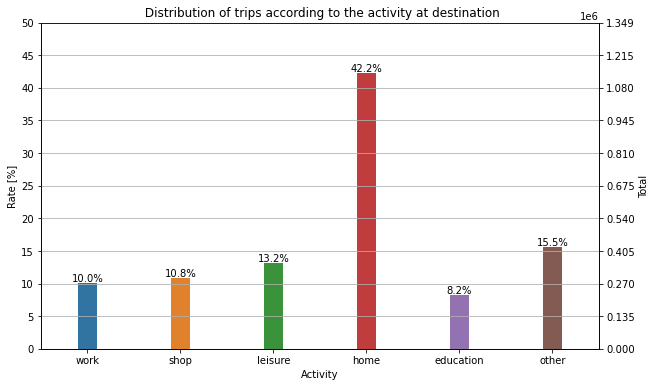

In [110]:
ncount = len(df_trips_recovery)

plt.figure(figsize=(10,6))
ax=sns.countplot(x='following_purpose', data=df_trips_recovery)

plt.title(' Distribution of trips according to the activity at destination')
plt.xlabel('Activity')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2)
ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)
plt.savefig('distribution_trip_activity.pdf')

Le principal motif de déplacement est le retour au domicile, les métropolitains rentrent
chez eux en moyenne plus de 1 100 000 fois par jour.
On observe que la principale activité est l'accompagnement (regroupé dans other).

In [111]:
df_trips_recovery["purpose"] = "other"

In [112]:
df_trips_recovery.loc[f_h_w,"purpose"] = "H-W"
df_trips_recovery.loc[f_h_e,"purpose"] = "H-E"
df_trips_recovery.loc[f_h_l,"purpose"] = "H-L"
df_trips_recovery.loc[f_h_s,"purpose"] = "H-S"
df_trips_recovery.loc[f_h_o,"purpose"] = "H-O"
df_trips_recovery.loc[f_second,"purpose"] = "Secondary"

In [113]:
df_trips_recovery

,person_id,trip_id,departure_time,arrival_time,trip_duration,activity_duration,following_purpose,preceding_purpose,is_last_trip,is_first_trip,...,car_availability,bike_availability,has_parking_place,has_parking_place_problem,has_pt_subscription,socioprofessional_class,number_of_trips,rec_trip_id,age_class,purpose
0,2,0,30600.0,32400.0,1800.0,33300.0,work,home,False,True,...,No,True,False,NaN,True,4,4,12,25-39,H-W
0,2,1,30600.0,32400.0,1800.0,33300.0,work,home,False,True,...,No,True,False,NaN,True,4,4,12,25-39,H-W
0,2,2,30600.0,32400.0,1800.0,33300.0,work,home,False,True,...,No,True,False,NaN,True,4,4,12,25-39,H-W
0,2,3,30600.0,32400.0,1800.0,33300.0,work,home,False,True,...,No,True,False,NaN,True,4,4,12,25-39,H-W
0,2,4,30600.0,32400.0,1800.0,33300.0,work,home,False,True,...,No,True,False,NaN,True,4,4,12,25-39,H-W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24571,10169,2698921,71400.0,72000.0,600.0,NaN,home,shop,True,False,...,Yes,True,True,3.0,False,3,7,38179,25-39,H-S
24571,10169,2698922,71400.0,72000.0,600.0,NaN,home,shop,True,False,...,Yes,True,True,3.0,False,3,7,38179,25-39,H-S
24571,10169,2698923,71400.0,72000.0,600.0,NaN,home,shop,True,False,...,Yes,True,True,3.0,False,3,7,38179,25-39,H-S
24571,10169,2698924,71400.0,72000.0,600.0,NaN,home,shop,True,False,...,Yes,True,True,3.0,False,3,7,38179,25-39,H-S


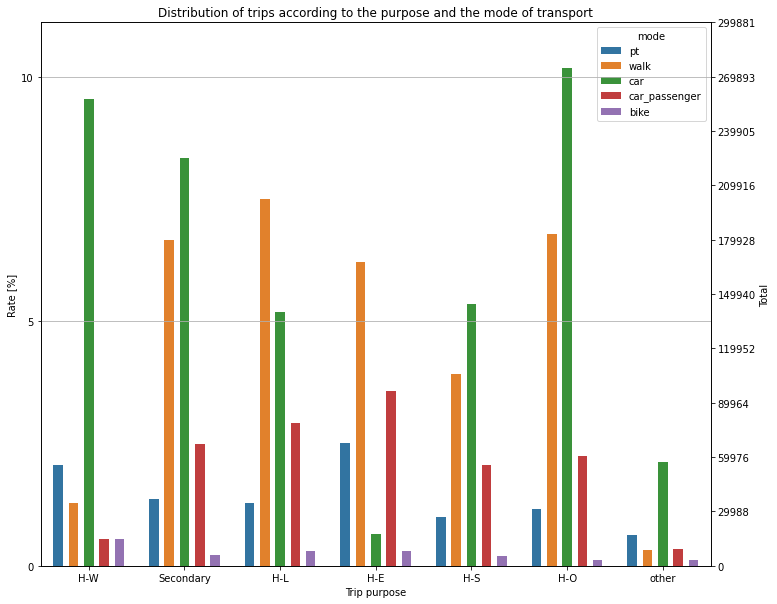

In [114]:
#Modes utilisés selon le motif
ncount = len(df_trips_recovery)
plt.figure(figsize=(12,10))
ax=sns.countplot(x="purpose", hue="mode", data=df_trips_recovery)

plt.title('Distribution of trips according to the purpose and the mode of transport')
plt.xlabel('Trip purpose')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    #ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
    #        ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/9)
ax.set_ylim(0,ncount/9)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .1)
plt.savefig('distribution_trip_purpose_mode_of_transport.pdf')

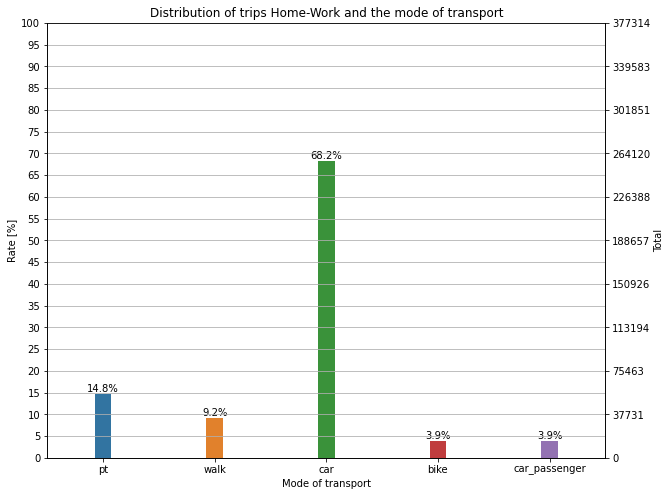

In [115]:
#Modes utilisés selon le motif Home-work
ncount = len(df_trips_recovery[df_trips_recovery["purpose"]=="H-W"])
plt.figure(figsize=(10,8))
ax=sns.countplot(x="mode", data=df_trips_recovery[df_trips_recovery["purpose"]=="H-W"])

plt.title('Distribution of trips Home-Work and the mode of transport')
plt.xlabel('Mode of transport')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .15)
plt.savefig('distribution_trip_H-W_mode_of_transport.pdf')

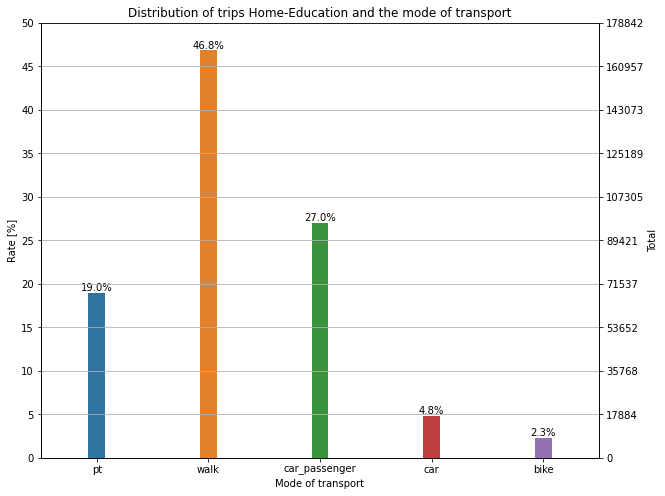

In [116]:
#Modes utilisés selon le motif Home-Education
ncount = len(df_trips_recovery[df_trips_recovery["purpose"]=="H-E"])
plt.figure(figsize=(10,8))
ax=sns.countplot(x="mode", data=df_trips_recovery[df_trips_recovery["purpose"]=="H-E"])

plt.title('Distribution of trips Home-Education and the mode of transport')
plt.xlabel('Mode of transport')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2)
ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .15)
plt.savefig('distribution_trip_H-E_mode_of_transport.pdf')

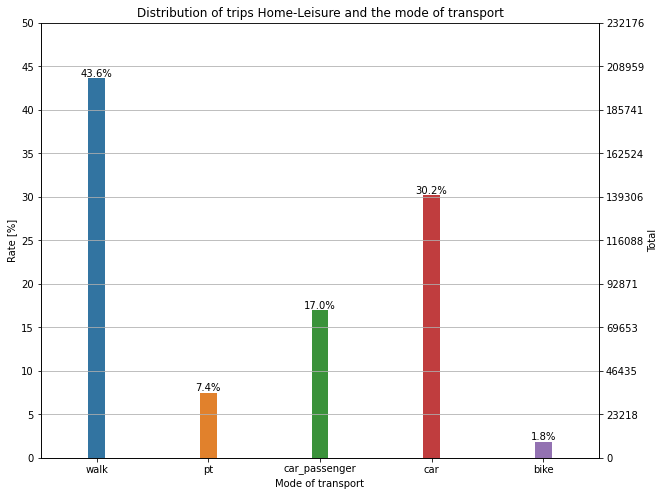

In [117]:
#Modes utilisés selon le motif Home-Leisure
ncount = len(df_trips_recovery[df_trips_recovery["purpose"]=="H-L"])
plt.figure(figsize=(10,8))
ax=sns.countplot(x="mode", data=df_trips_recovery[df_trips_recovery["purpose"]=="H-L"])

plt.title('Distribution of trips Home-Leisure and the mode of transport')
plt.xlabel('Mode of transport')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2)
ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .15)
plt.savefig('distribution_trip_H-L_mode_of_transport.pdf')

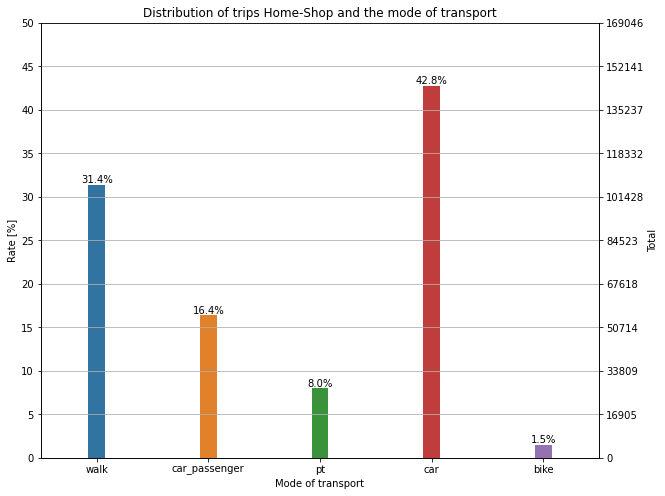

In [118]:
#Modes utilisés selon le motif Home-Shop
ncount = len(df_trips_recovery[df_trips_recovery["purpose"]=="H-S"])
plt.figure(figsize=(10,8))
ax=sns.countplot(x="mode", data=df_trips_recovery[df_trips_recovery["purpose"]=="H-S"])

plt.title('Distribution of trips Home-Shop and the mode of transport')
plt.xlabel('Mode of transport')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2)
ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .15)
plt.savefig('distribution_trip_H-S_mode_of_transport.pdf')

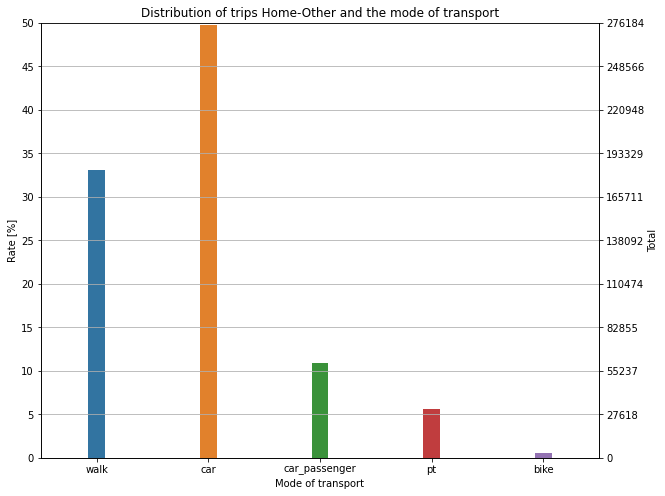

In [119]:
#Modes utilisés selon le motif Home-Other
ncount = len(df_trips_recovery[df_trips_recovery["purpose"]=="H-O"])
plt.figure(figsize=(10,8))
ax=sns.countplot(x="mode", data=df_trips_recovery[df_trips_recovery["purpose"]=="H-O"])

plt.title('Distribution of trips Home-Other and the mode of transport')
plt.xlabel('Mode of transport')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    #ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
    #        ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2)
ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .15)
plt.savefig('distribution_trip_H-O_mode_of_transport.pdf')

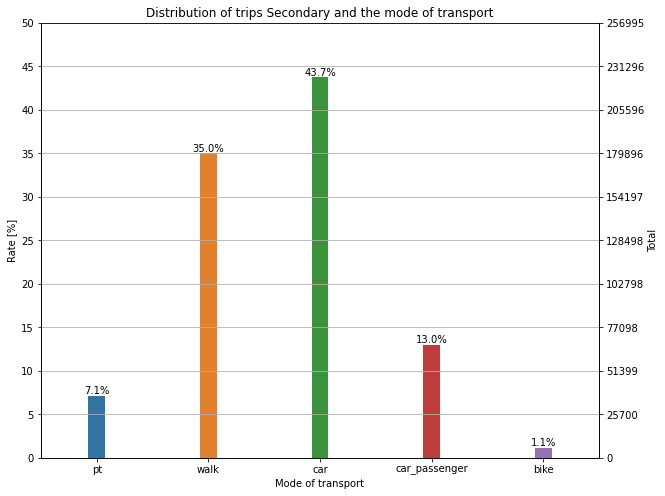

In [120]:
#Modes utilisés selon le motif Secondary
ncount = len(df_trips_recovery[df_trips_recovery["purpose"]=="Secondary"])
plt.figure(figsize=(10,8))
ax=sns.countplot(x="mode", data=df_trips_recovery[df_trips_recovery["purpose"]=="Secondary"])

plt.title('Distribution of trips Secondary and the mode of transport')
plt.xlabel('Mode of transport')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2)
ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .15)
plt.savefig('distribution_trip_Secondary_mode_of_transport.pdf')

Les motifs de déplacement influent de manière importante sur les modes utilisés.
+ La marche depasse l'utilisation de la voiture pour les motifs domicile-école et domicile-loisir. Elle reste cependant bien plus faible pour le domicile-travail. Ces résultats ne sont pas surprenants : les écoles, notamment primaires, sont assez bien réparties sur le territoire et accessibles à pied dans de nombreux cas. A l'inverse, le lieu de travail est souvent assez éloigné du domicile limitant la possibilité de s’y rendre en marchant.
+ Pour les déplacements domicile-travail, la voiture en tant que conducteur est la plus utilisée, avec près de 70% de part modale. C’est aussi pour ce motif que la voiture en tant que passager est la plus faible, avec 4,0% des déplacements.
+ La voiture en tant que passager est très élevée pour les déplacements domicile-école (qui couvre les déplacements de la maternelle au lycée ici) avec 32,0% de part modale.
+ L'utilisation de transports publics se fait significativement au-dessus de la moyenne pour les déplacements vers le travail (15,0%), l'école et luniversité (20,1%). Il s'agit de résultats assez logiques s'agissant de déplacements contraints, plutôt répétitifs et vers des zones en général bien desservies.
+ Le plus fort usage du vélo est observé pour ces trois motifs.

#### Répartition horaire des déplacements

#### Déplacements intermodaux

Les déplacements sont classés en trois catégories :
+ Les déplacements à pied ;
+ Les déplacements monomodaux (un seul mode mécanisé, avec éventuellement de la marche avant/après) ;
+ Les déplacements intermodaux (au moins deux modes mécanisés enchaînés, ces deux modes pouvant être identique – cas d’une correspondance bus/bus par exemple – avec éventuellement de la marche avant/pendant/après).

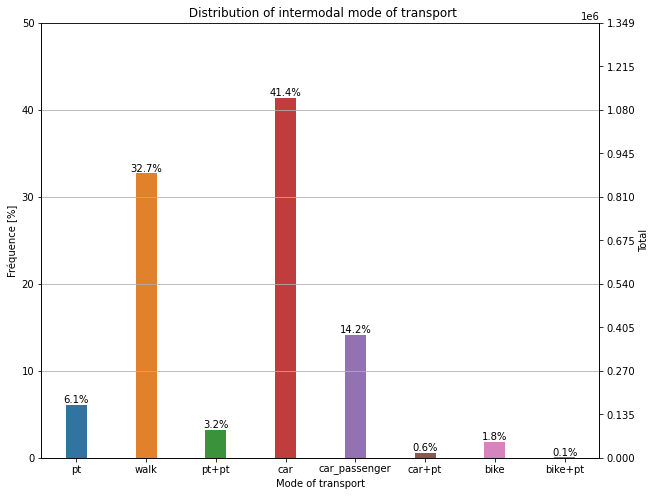

In [121]:
ncount = len(df_trips_recovery)

plt.figure(figsize=(10,8))
ax=sns.countplot(x='mode_meca', data=df_trips_recovery)

plt.title(' Distribution of intermodal mode of transport')
plt.xlabel('Mode of transport')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2)
ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .3)
plt.savefig('distribution_mode_intermodal.pdf')

In [122]:
df_trips_recovery["trip_type"] = "walk"

In [123]:
df_trips_recovery.loc[df_trips_recovery["mode_meca"]=="walk","trip_type"] = "walk"
df_trips_recovery.loc[df_trips_recovery["mode_meca"]=="car","trip_type"] = "monomodal"
df_trips_recovery.loc[df_trips_recovery["mode_meca"]=="car_passenger","trip_type"] = "monomodal"
df_trips_recovery.loc[df_trips_recovery["mode_meca"]=="pt","trip_type"] = "monomodal"
df_trips_recovery.loc[df_trips_recovery["mode_meca"]=="bike","trip_type"] = "monomodal"
df_trips_recovery.loc[df_trips_recovery["mode_meca"]=="pt+pt","trip_type"] = "intermodal"
df_trips_recovery.loc[df_trips_recovery["mode_meca"]=="car+pt","trip_type"] = "intermodal"
df_trips_recovery.loc[df_trips_recovery["mode_meca"]=="bike+pt","trip_type"] = "intermodal"

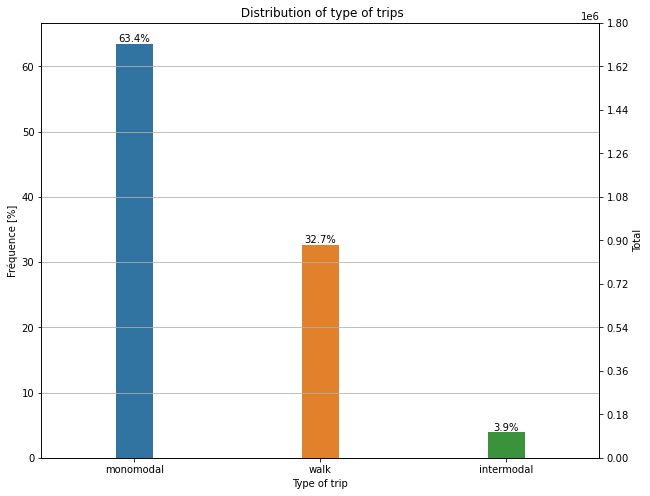

In [124]:
ncount = len(df_trips_recovery)

plt.figure(figsize=(10,8))
ax=sns.countplot(x='trip_type', data=df_trips_recovery)

plt.title(' Distribution of type of trips')
plt.xlabel('Type of trip')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/1.5)
ax.set_ylim(0,ncount/1.5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)
plt.savefig('type_of_trip.pdf')

In [125]:
df_trips_recovery["has_parking_place_problem"] = df_trips_recovery["has_parking_place_problem"].fillna(5)
df_trips_recovery

,person_id,trip_id,departure_time,arrival_time,trip_duration,activity_duration,following_purpose,preceding_purpose,is_last_trip,is_first_trip,...,bike_availability,has_parking_place,has_parking_place_problem,has_pt_subscription,socioprofessional_class,number_of_trips,rec_trip_id,age_class,purpose,trip_type
0,2,0,30600.0,32400.0,1800.0,33300.0,work,home,False,True,...,True,False,5.0,True,4,4,12,25-39,H-W,monomodal
0,2,1,30600.0,32400.0,1800.0,33300.0,work,home,False,True,...,True,False,5.0,True,4,4,12,25-39,H-W,monomodal
0,2,2,30600.0,32400.0,1800.0,33300.0,work,home,False,True,...,True,False,5.0,True,4,4,12,25-39,H-W,monomodal
0,2,3,30600.0,32400.0,1800.0,33300.0,work,home,False,True,...,True,False,5.0,True,4,4,12,25-39,H-W,monomodal
0,2,4,30600.0,32400.0,1800.0,33300.0,work,home,False,True,...,True,False,5.0,True,4,4,12,25-39,H-W,monomodal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24571,10169,2698921,71400.0,72000.0,600.0,NaN,home,shop,True,False,...,True,True,3.0,False,3,7,38179,25-39,H-S,monomodal
24571,10169,2698922,71400.0,72000.0,600.0,NaN,home,shop,True,False,...,True,True,3.0,False,3,7,38179,25-39,H-S,monomodal
24571,10169,2698923,71400.0,72000.0,600.0,NaN,home,shop,True,False,...,True,True,3.0,False,3,7,38179,25-39,H-S,monomodal
24571,10169,2698924,71400.0,72000.0,600.0,NaN,home,shop,True,False,...,True,True,3.0,False,3,7,38179,25-39,H-S,monomodal


In [126]:
df_trips_recovery.loc[df_trips_recovery["has_parking_place_problem"] == 1, "has_parking_place_problem"] = "Yes"
df_trips_recovery.loc[df_trips_recovery["has_parking_place_problem"] == 2, "has_parking_place_problem"] = "No, free"
df_trips_recovery.loc[df_trips_recovery["has_parking_place_problem"] == 3, "has_parking_place_problem"] = "No, paying"
df_trips_recovery.loc[df_trips_recovery["has_parking_place_problem"] == 4, "has_parking_place_problem"] = "No, free"
df_trips_recovery.loc[df_trips_recovery["has_parking_place_problem"] == 5, "has_parking_place_problem"] = "No info"

In [127]:
df_trips_intermodal = df_trips_recovery[df_trips_recovery["trip_type"]=="intermodal"]

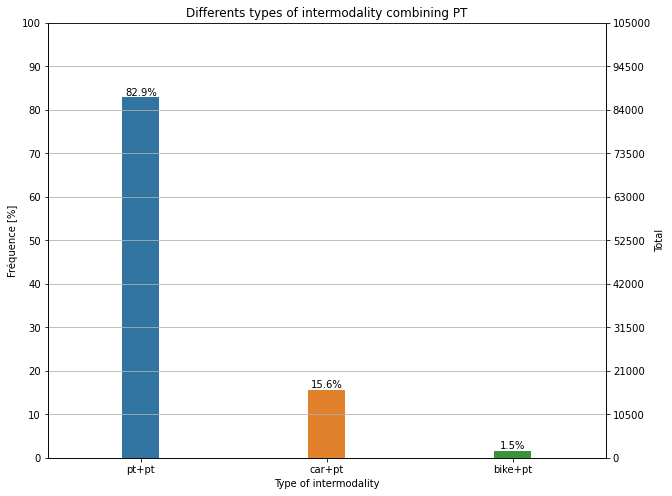

In [128]:
ncount = len(df_trips_intermodal)

plt.figure(figsize=(10,8))
ax=sns.countplot(x='mode_meca', data=df_trips_intermodal)

plt.title('Differents types of intermodality combining PT')
plt.xlabel('Type of intermodality')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)
plt.savefig('different_types_intermodality_with_pt.pdf')

82.5% des déplacements intermodaux ne comportent que des correspondances entre services de transports en commun. 
L’intermodalité qui est généralement recherchée par les pouvoirs publics concerne la voiture (voiture+TCU ou voiture+train via les parkings relais ou voiture+voiture via les aires de covoiturage). Cette intermodalité faisant intervenir la voiture en tant que conducteur, concerne moins de 16% des déplacements intermodaux.

##### Profil des usagers de l'intermodalité

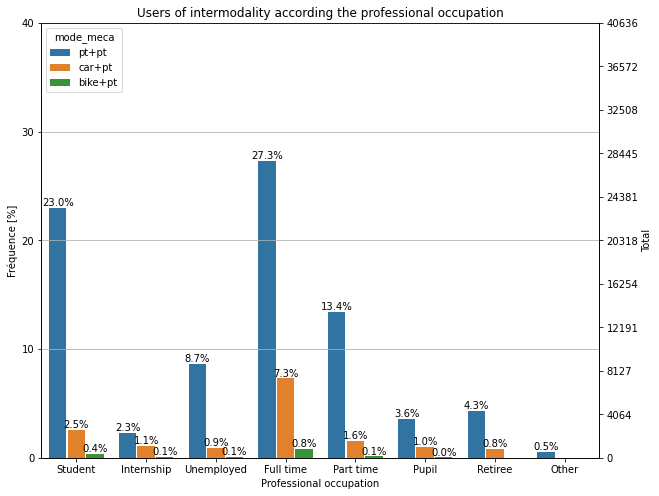

In [129]:
ncount = len(df_trips_intermodal[df_trips_intermodal["professional_occupation"]!="Home"])

plt.figure(figsize=(10,8))
ax=sns.countplot(x="professional_occupation", hue='mode_meca', data=df_trips_intermodal[df_trips_intermodal["professional_occupation"]!="Home"])

plt.title('Users of intermodality according the professional occupation')
plt.xlabel('Professional occupation')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2.5)
ax.set_ylim(0,ncount/2.5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .25)
plt.savefig('intermodality_users_professional_occupation.pdf')

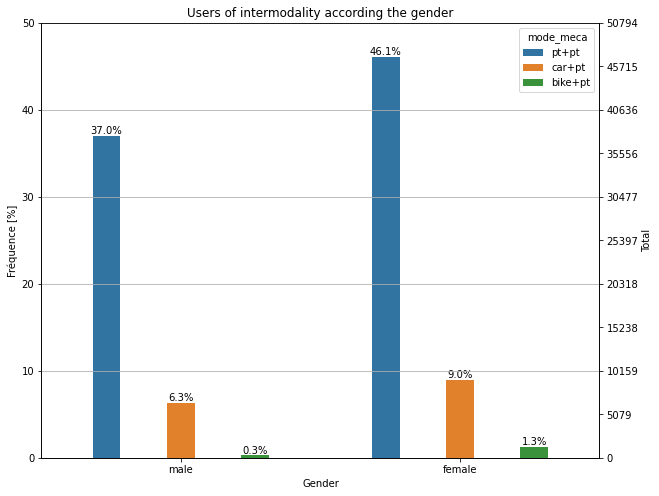

In [130]:
ncount = len(df_trips_intermodal[df_trips_intermodal["professional_occupation"]!="Home"])

plt.figure(figsize=(10,8))
ax=sns.countplot(x="sex", hue='mode_meca', data=df_trips_intermodal[df_trips_intermodal["professional_occupation"]!="Home"])

plt.title('Users of intermodality according the gender')
plt.xlabel('Gender')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2)
ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .1)
plt.savefig('intermodality_users_gender.pdf')

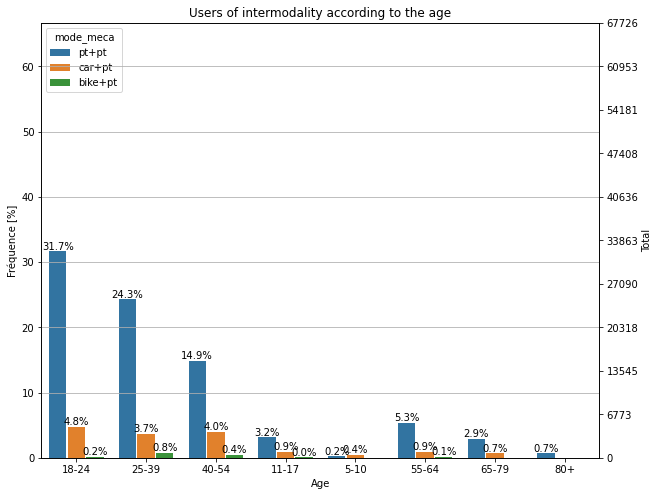

In [131]:
ncount = len(df_trips_intermodal[df_trips_intermodal["professional_occupation"]!="Home"])

plt.figure(figsize=(10,8))
ax=sns.countplot(x="age_class", hue='mode_meca', data=df_trips_intermodal[df_trips_intermodal["professional_occupation"]!="Home"])

plt.title('Users of intermodality according to the age')
plt.xlabel('Age')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/1.5)
ax.set_ylim(0,ncount/1.5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .25)
plt.savefig('intermodality_users_age.pdf')

In [132]:
df_trips_car_pt = df_trips_intermodal[df_trips_intermodal["mode_meca"]=="car+pt"]

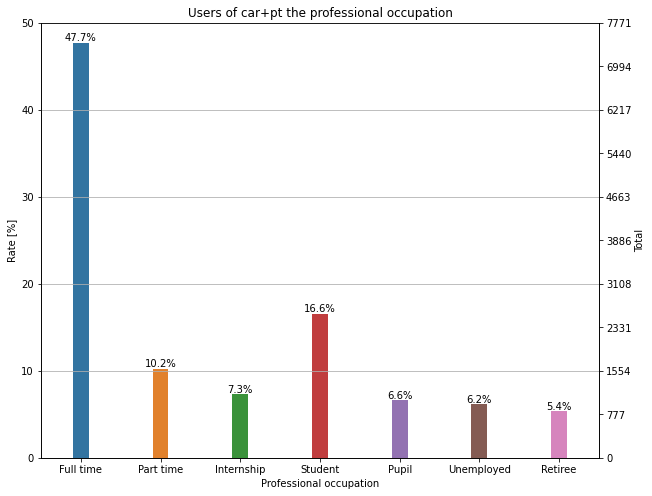

In [133]:
ncount = len(df_trips_car_pt[df_trips_car_pt["professional_occupation"]!="Home"])

plt.figure(figsize=(10,8))
ax=sns.countplot(x='professional_occupation', data=df_trips_car_pt[df_trips_car_pt["professional_occupation"]!="Home"])

plt.title('Users of car+pt the professional occupation')
plt.xlabel('Professional occupation')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2)
ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)
plt.savefig('car_pt_users_professional_occupation.pdf')

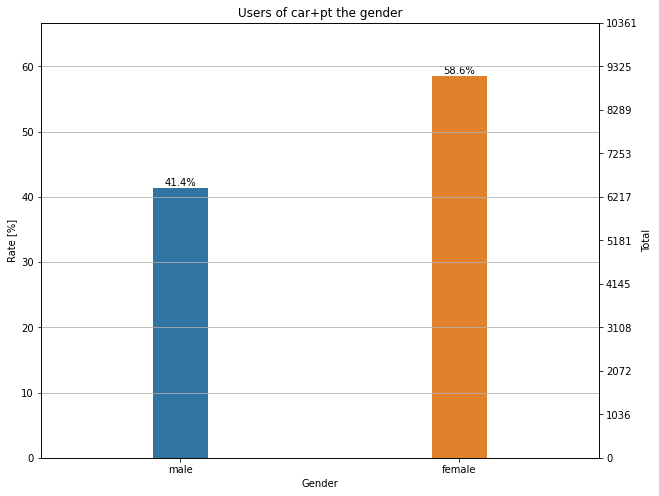

In [134]:
ncount = len(df_trips_car_pt[df_trips_car_pt["professional_occupation"]!="Home"])

plt.figure(figsize=(10,8))
ax=sns.countplot(x='sex', data=df_trips_car_pt[df_trips_car_pt["professional_occupation"]!="Home"])

plt.title('Users of car+pt the gender')
plt.xlabel('Gender')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/1.5)
ax.set_ylim(0,ncount/1.5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)
plt.savefig('car_pt_users_gender.pdf')

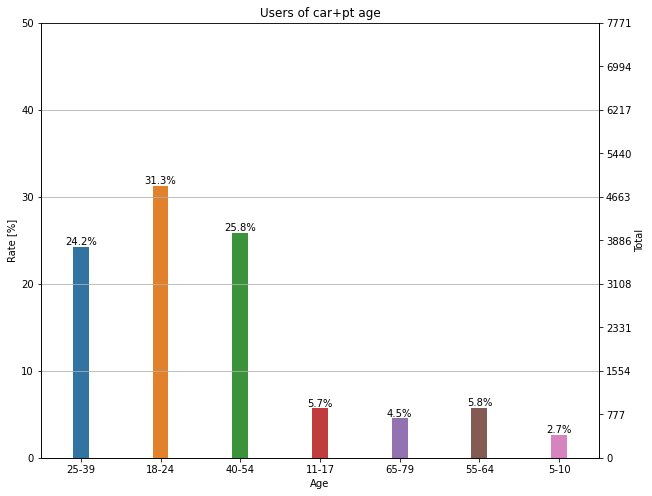

In [135]:
ncount = len(df_trips_car_pt[df_trips_car_pt["professional_occupation"]!="Home"])

plt.figure(figsize=(10,8))
ax=sns.countplot(x='age_class', data=df_trips_car_pt[df_trips_car_pt["professional_occupation"]!="Home"])

plt.title('Users of car+pt age')
plt.xlabel('Age')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2)
ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)
plt.savefig('car_pt_users_age.pdf')

##### Motif des deplacements intermodaux

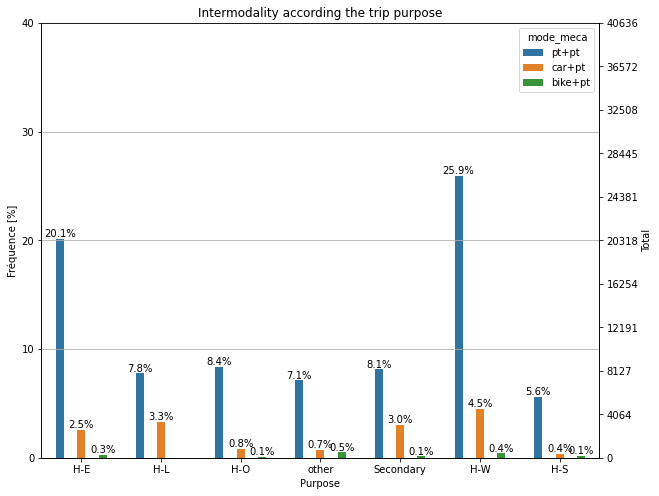

In [136]:
ncount = len(df_trips_intermodal[df_trips_intermodal["professional_occupation"]!="Home"])

plt.figure(figsize=(10,8))
ax=sns.countplot(x="purpose", hue='mode_meca', data=df_trips_intermodal[df_trips_intermodal["professional_occupation"]!="Home"])

plt.title('Intermodality according the trip purpose')
plt.xlabel('Purpose')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2.5)
ax.set_ylim(0,ncount/2.5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .1)
plt.savefig('intermodality_trip_purpose.pdf')

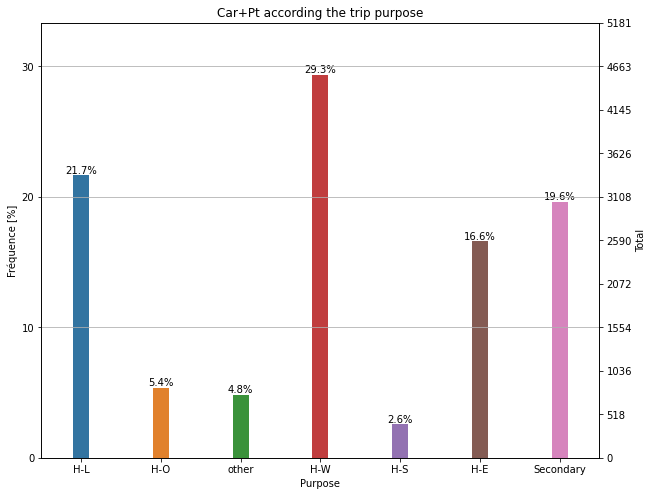

In [137]:
ncount = len(df_trips_car_pt[df_trips_car_pt["professional_occupation"]!="Home"])

plt.figure(figsize=(10,8))
ax=sns.countplot(x="purpose", data=df_trips_car_pt[df_trips_car_pt["professional_occupation"]!="Home"])

plt.title('Car+Pt according the trip purpose')
plt.xlabel('Purpose')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/3)
ax.set_ylim(0,ncount/3)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .2)
plt.savefig('car_pt_trip_purpose.pdf')

###### Intermodalité (car+pt) et difficulté de stationnement

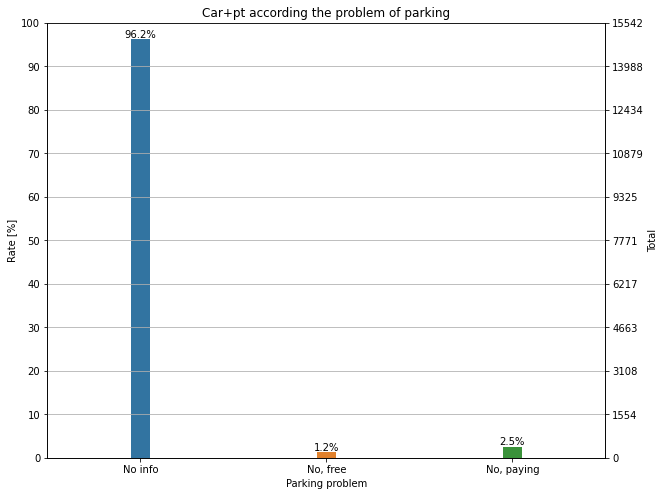

In [138]:
ncount = len(df_trips_car_pt[df_trips_car_pt["professional_occupation"]!="Home"])

plt.figure(figsize=(10,8))
ax=sns.countplot(x="has_parking_place_problem", data=df_trips_car_pt[df_trips_car_pt["professional_occupation"]!="Home"])

plt.title('Car+pt according the problem of parking')
plt.xlabel('Parking problem')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Rate [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .1)
plt.savefig('car_pt_parking_problem.pdf')

#### Longueur à vol d'oiseau et vitesse des déplacements

In [139]:
#Parts modales selon la portée du déplacement